In [ ]:
# use this code in the anaconda prompt, not in jupyter notebook
#conda install -c conda-forge python-annoy
#pip install bbknn

^C


In [1]:
import bbknn

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-05-24 11:33.


In [3]:
import seaborn as sns
import matplotlib as mpl
import plotly.graph_objects as go
#from pySankey.sankey import sankey
#import holoviews as hv

In [4]:
import seaborn as sns
import matplotlib as mpl
import plotly.graph_objects as go
from pysankey2 import Sankey
import matplotlib.pyplot as plt

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.5


In [6]:
import os
os.chdir('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4')

In [7]:
import scanpy.external as sce

In [216]:
#adata_T.write('T_cell_from_1_5.h5ad', compression='gzip')

In [217]:
#adata_M.write('M_cell_from_1_5.h5ad', compression='gzip')

In [8]:
adata_T = sc.read('T_cell_from_1_5.h5ad')

In [12]:
adata_T

AnnData object with n_obs × n_vars = 114974 × 12499
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44'
    var: 'gene_ids', 'mt', 'feature_types-10', 'feature_types-11', 'feature_types-12', 'feature_types-13', 'feature_types-14', 'feature_types-15', 'feature_types-16', 'feature_types-17', 'feature_types-18', 'feature_types-19', 'feature_types-20', 'feature_types-21', 'feature_types-3', 'feature_types-4', 'feature_types-5', 'feature_types-6', 'feature_types-7', 'feature_types-8', 'feature_types-9', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_c

In [16]:
adata_T.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGTAGCCGA-1-0-0    3934.0               3879   1452.073242   
AAACCTGCAAGAGGCT-1-0-0     674.0                669    882.995728   
AAACCTGCAGTATCTG-1-0-0    1014.0               1003    956.411804   
AAACCTGGTGCCTGGT-1-0-0     896.0                885   1091.559448   
AAACCTGGTGCGCTTG-1-0-0     786.0                772    876.556519   
...                          ...                ...           ...   
TTTGGTTAGCAAATCA-1-24-2   1375.0               1351   1476.700806   
TTTGGTTAGTGGTAAT-1-24-2   1606.0               1573   1480.355835   
TTTGGTTCAAGCCATT-1-24-2   4456.0               4328   1867.209229   
TTTGTCAGTCCTCTTG-1-24-2   2711.0               2644   1972.602417   
TTTGTCAGTCTCTTTA-1-24-2   1890.0               1858   1673.672119   

                         total_counts_mt  pct_counts_mt tissue patient leiden  \
AAACCTGAGTAGCCGA-1-0-0         18.802568       1.294877  tumor    P686      6   
AAACCTGCAAGAGGCT-1-0-0         11.229170       1.271713  tumor    P686      6   
AAACCTGCAGTATCTG-1-0-0         18.788149       1.964441  tumor    P686      6   
AAACCTGGTGCCTGGT-1-0-0         17.238060       1.579214  tumor    P686      6   
AAACCTGGTGCGCTTG-1-0-0         18.123993       2.067635  tumor    P686      6   
...                                  ...            ...    ...     ...    ...   
TTTGGTTAGCAAATCA-1-24-2        22.369625       1.514838  tumor    P001      1   
TTTGGTTAGTGGTAAT-1-24-2        29.242380       1.975362  tumor    P001      4   
TTTGGTTCAAGCCATT-1-24-2        29.546848       1.582407  tumor    P001      0   
TTTGTCAGTCCTCTTG-1-24-2        24.433256       1.238631  tumor    P001     10   
TTTGTCAGTCTCTTTA-1-24-2         7.590561       0.453527  tumor    P001      4   

                        batch  total_counts_ribo  ...     n_counts  celltype  \
AAACCTGAGTAGCCGA-1-0-0      0         198.197769  ...  1452.073242         6   
AAACCTGCAAGAGGCT-1-0-0      0         213.666718  ...   882.995728         6   
AAACCTGCAGTATCTG-1-0-0      0         221.148575  ...   956.411804         6   
AAACCTGGTGCCTGGT-1-0-0      0         176.360626  ...  1091.559448         6   
AAACCTGGTGCGCTTG-1-0-0      0         217.813019  ...   876.556519         6   
...                       ...                ...  ...          ...       ...   
TTTGGTTAGCAAATCA-1-24-2     2         184.743835  ...  1476.700806         1   
TTTGGTTAGTGGTAAT-1-24-2     2         188.684555  ...  1480.355835         4   
TTTGGTTCAAGCCATT-1-24-2     2         172.502136  ...  1867.209229         0   
TTTGTCAGTCCTCTTG-1-24-2     2         120.637726  ...  1972.602417        10   
TTTGTCAGTCTCTTTA-1-24-2     2         163.753265  ...  1673.672119         4   

                          crude   celltype_detail  patient_cluster  \
AAACCTGAGTAGCCGA-1-0-0   T cell        CD8 T cell          Group A   
AAACCTGCAAGAGGCT-1-0-0   T cell        CD8 T cell          Group A   
AAACCTGCAGTATCTG-1-0-0   T cell        CD8 T cell          Group A   
AAACCTGGTGCCTGGT-1-0-0   T cell        CD8 T cell          Group A   
AAACCTGGTGCGCTTG-1-0-0   T cell        CD8 T cell          Group A   
...                         ...               ...              ...   
TTTGGTTAGCAAATCA-1-24-2  T cell   effector T cell          Group A   
TTTGGTTAGTGGTAAT-1-24-2  T cell        CD4 T cell          Group A   
TTTGGTTCAAGCCATT-1-24-2  T cell        CD4 T cell          Group A   
TTTGTCAGTCCTCTTG-1-24-2  T cell  exhausted T cell          Group A   
TTTGTCAGTCTCTTTA-1-24-2  T cell        CD4 T cell          Group A   

                               dataset T_patient_cluster T_patient_cluster4  \
AAACCTGAGTAGCCGA-1-0-0    Dinh dataset               NaN                T_3   
AAACCTGCAAGAGGCT-1-0-0    Dinh dataset               NaN                T_3   
AAACCTGCAGTATCTG-1-0-0    Dinh dataset               NaN                T_3   
AAACCTGGTGCCTGGT-1-0-0    Dinh dataset               NaN                T_3   
AAACCTGGTGCGCTTG-1-0-0    

In [ ]:
"HSPA1A", "HSPA1B", "DNAJB1", "HSPB1", "HSP90AA1","HSPA6", "HSPA8", "HSPH1", "SERPINH1", "UBB", "FKBP4", "MRPL18", "DEDD2", "HSP90AB1", "PTGES3", "DNAJB6"

# m3t4 specific feature in GOBP 

In [18]:
# REACTOME: M1T4 exclusive
HSF1_genes = ["HSPA1A", "HSPA1B", "DNAJB1", "HSPB1", "HSP90AA1",
                         "HSPA6", "HSPA8", "HSPH1", "SERPINH1", "UBB", "FKBP4", "MRPL18", "DEDD2", "HSP90AB1", "PTGES3", "DNAJB6"]

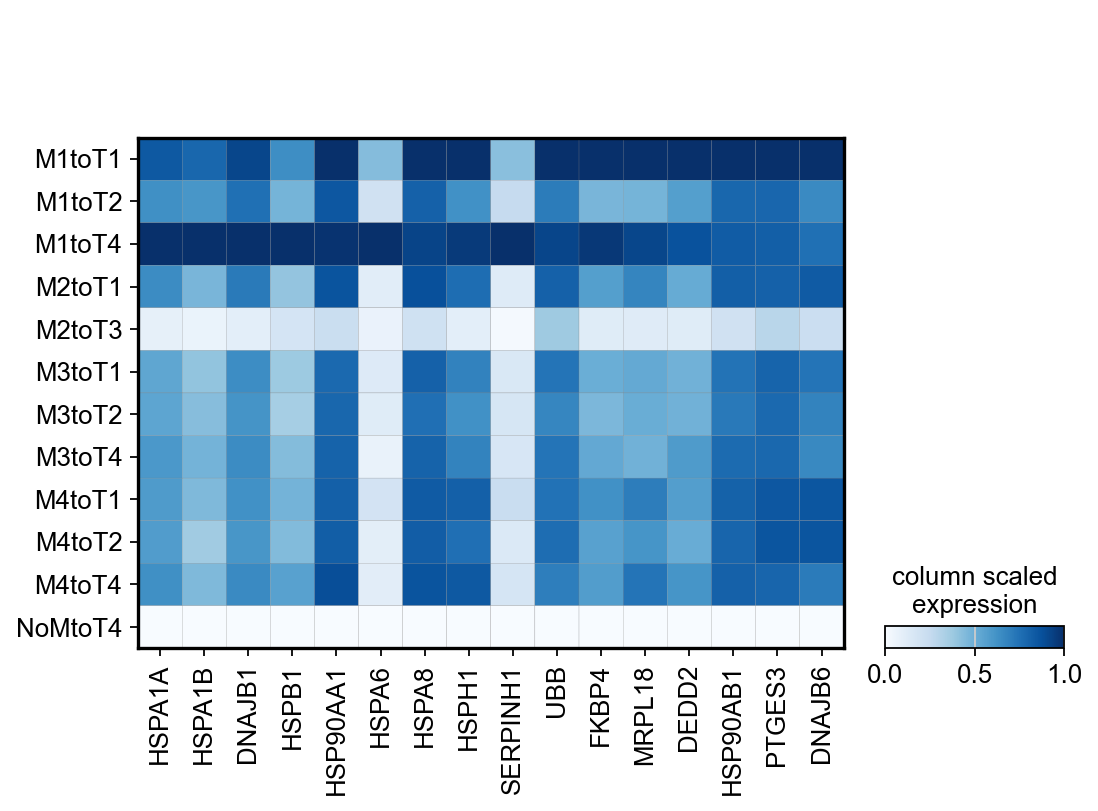

In [17]:
sc.pl.matrixplot(adata_T, HSF1_genes, 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

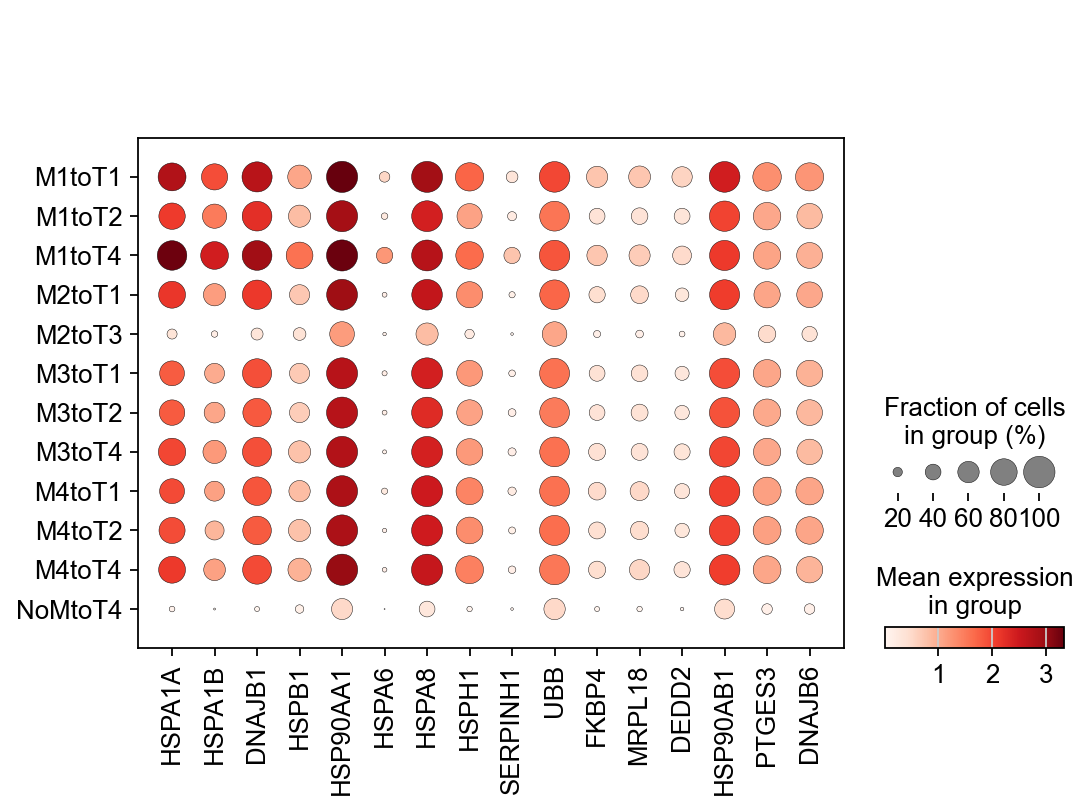

In [19]:
sc.pl.dotplot(adata_T, HSF1_genes, 'Myeloid_to_T_cluster44')

In [20]:
# GOBP: M3T4 T cell + PBMC-R T cell shared
FGF_response= ['CCL5', 'CXCL13', 'ZFP36L2', 'GATA3', 'IQGAP1', 'FIBP', 'ITGB1BP1', 'ZFP36', 'CTNNB1', 'RUNX2', 'NR4A1', 'PTPN11',
               'SETX', 'RAB14']
GOBP_VIRAL_GENOME_REPLICATION =['CCL5', 'IFITM1', 'MX1', 'BST2', 'PCBP1', 'ISG15', 'APOBEC3C', 'APOBEC3G', 'OASL', 'PLSCR1',
                                'OAS1', 'IFITM3', 'EIF2AK2', 'CXCR6', 'IFITM2', 'OAS2', 'RSAD2', 'HSPA8', 'OAS3', 'ZC3H12A', 
                                'ADAR', 'ISG20', 'BANF1', 'PPIB', 'IFIT1', 'PPID', 'SHFL', 'RAD23A', 'IFIT5', 'IFIH1', 'SMARCB1',
                                'DEK', 'N4BP1', 'PARP10', 'ZNFX1', 'PCBP2', 'LAMTOR5', 'APOBEC3D', 'IFI16', 'VCP', 'PPIH']
GOBP_REGULATION_OF_CELL_MORPHOGENESIS=['CORO1A', 'MYL12A', 'CFL1', 'RHOA', 'RAC2', 'CCL3', 'MSN', 'CALR', 'DBN1', 'SEMA4D', 'RAC1',
                                       'MYH9', 'ARPC2', 'SLC9A3R1', 'ITGB1BP1', 'EZR', 'ACTN4', 'FLNA', 'NEDD9', 'RHOH', 'RHOC', 'WDR1',
                                       'CXCR4', 'PREX1', 'DBNL', 'P4HB', 'MYL12B', 'SEMA4A', 'PRPF40A', 'ARHGAP18', 'CAPZB', 'MYADM',
                                       'GBP1', 'SEPTIN7', 'RHOB', 'ALDOA', 'CAPRIN1', 'FMNL1', 'PAFAH1B1', 'CASS4', 'ILK', 'DMTN',
                                       'RASA1', 'ARHGEF18', 'PLAA']
GOBP_REGULATION_OF_ION_TRANSPORT=['CCL5', 'RGS2', 'CORO1A', 'CCL4', 'ACTB', 'GEM', 'RHOA', 'CCL3', 'CD63', 'PDE4D', 'CLIC3', 'SRI',
                                  'AKAP5', 'CLIC1', 'RAB3GAP1', 'FKBP1A', 'SLC9A3R1', 'PHB2', 'GNB2', 'LGALS3', 'TSPO', 'BIN1', 'ACTN4',
                                  'CEBPB', 'RAB11B', 'PTPN6', 'VAMP2', 'FLNA', 'ABCB1', 'TMEM109', 'ARRB2', 'GNAI2', 'TSPAN13', 'PARK7',
                                  'G6PD', 'CXCR4', 'CTNNB1', 'SNX6', 'SYT11', 'CALM1', 'CALM3', 'BAK1', 'BAX', 'CCR1', 'ITGB1', 'KCNK5',
                                  'ANTKMT', 'CD84', 'VDAC1', 'PML', 'PDE4B', 'C4orf3', 'YWHAH', 'KIF5B', 'PRNP', 'PXK', 'RANGRF', 'CAPN1',
                                  'CLIC5', 'XCL1', 'UBASH3B', 'ATG5', 'B2M', 'CAB39', 'CALM2', 'TCIRG1', 'CRACR2A', 'YWHAE', 'TRIM27', 'TRPV2']
IFN_G_genes = ['HLA-DPA1', 'ISG15', 'HAVCR2', 'PTPN22', 'HLA-DRB1', 'GATA3', 'CD96', 'HLA-DPB1', 'KLRK1', 'CRTAM', 'LGALS9',
               'PDE4D', 'SLC7A5', 'TNFSF4', 'ZC3H12A', 'CD3E', 'CD226', 'PYCARD', 'DDIT3', 'PDE4B', 'HMGB1', 'PRNP', 'BCL3',
               'BTN3A2', 'SLAMF6', 'XCL1']

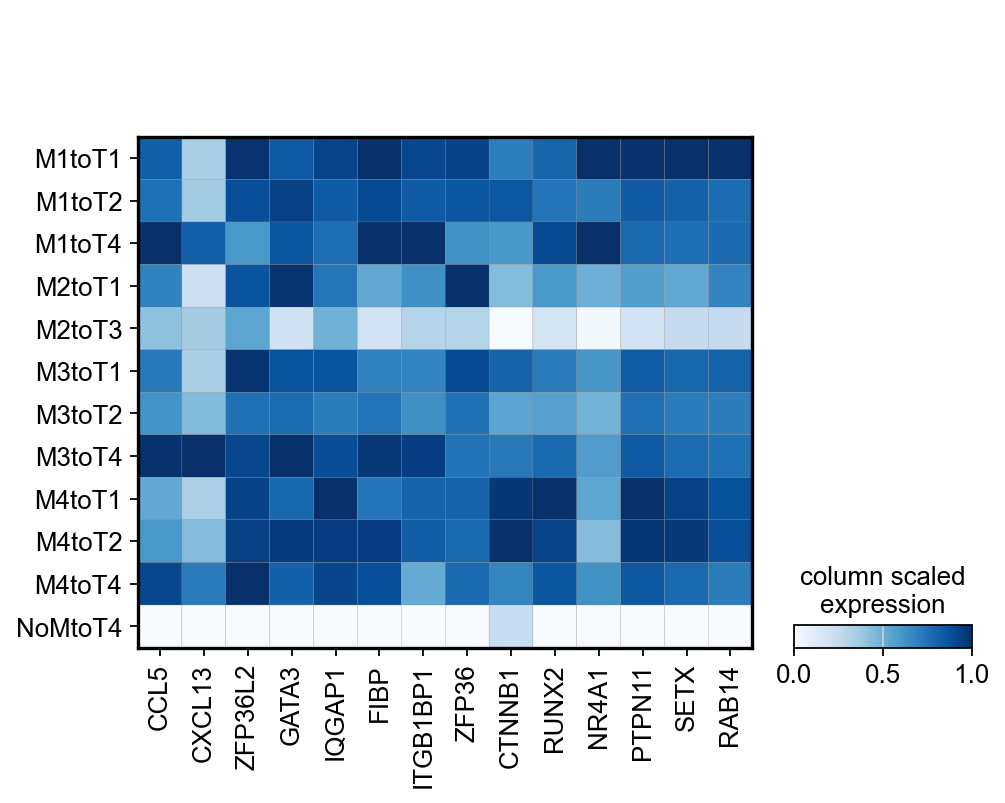

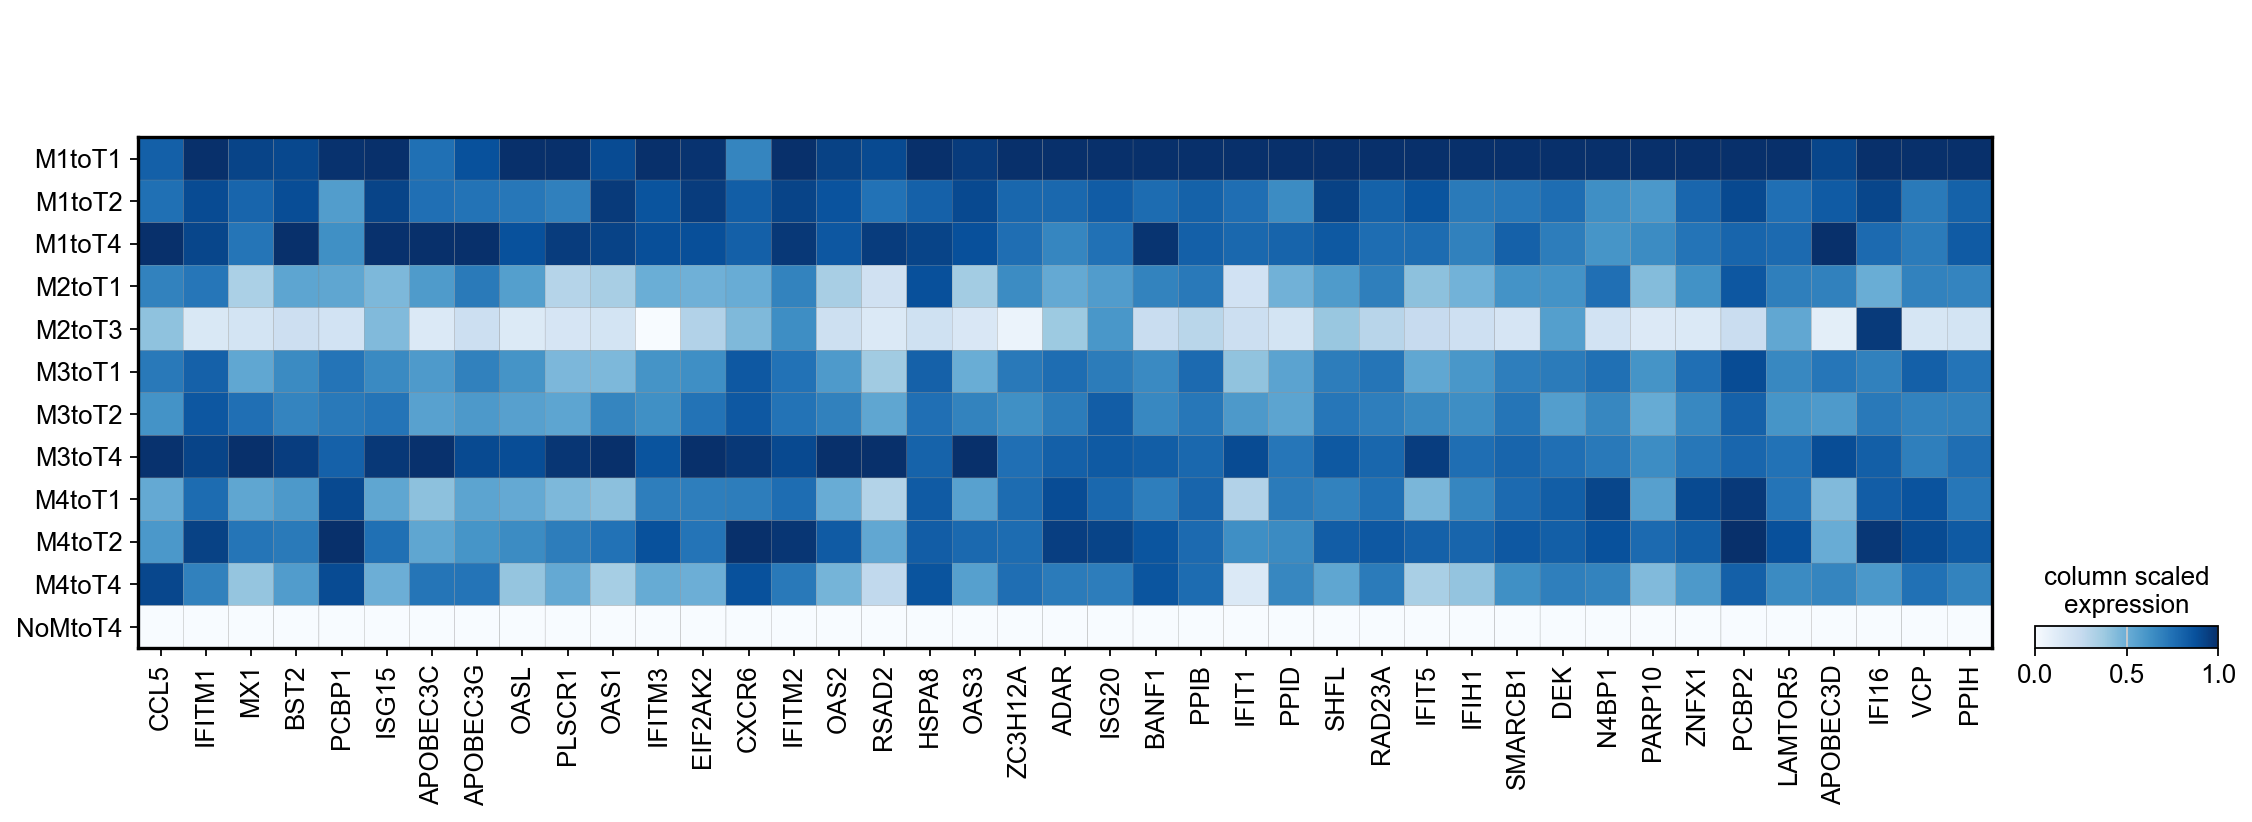

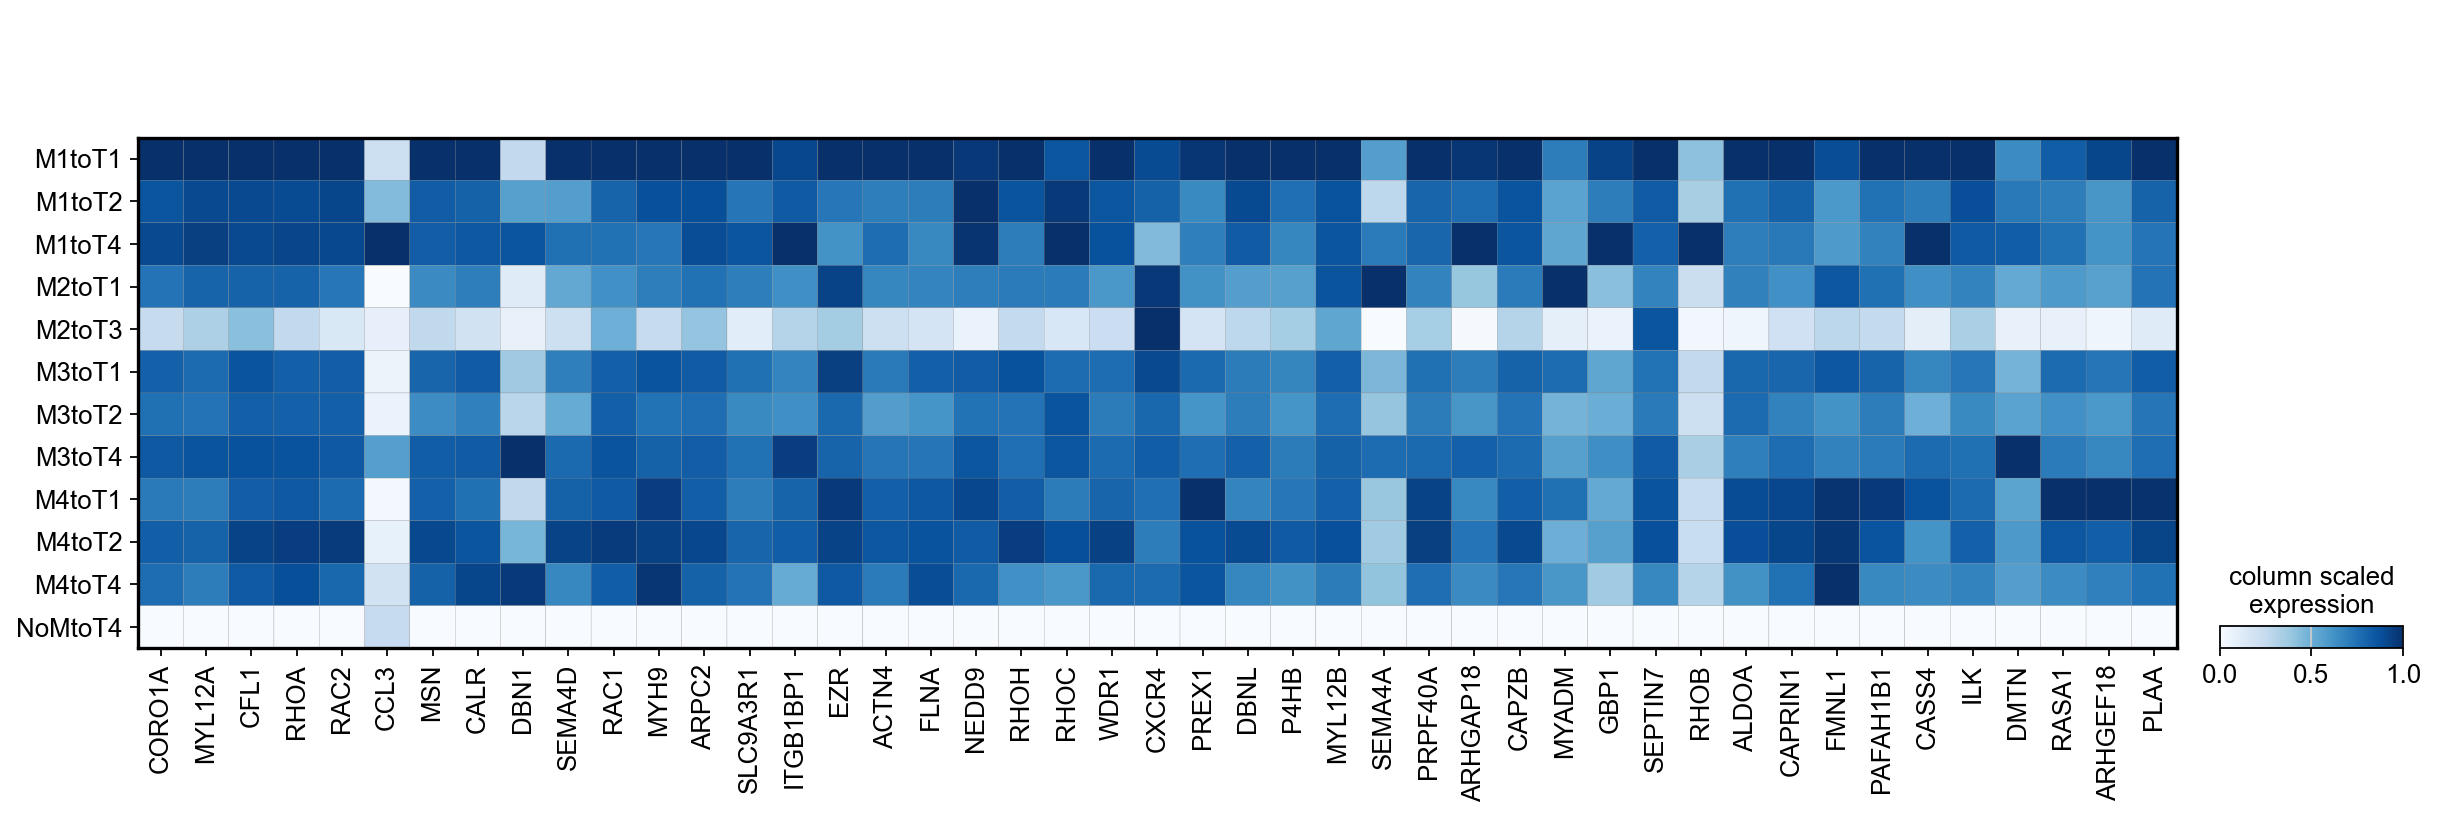

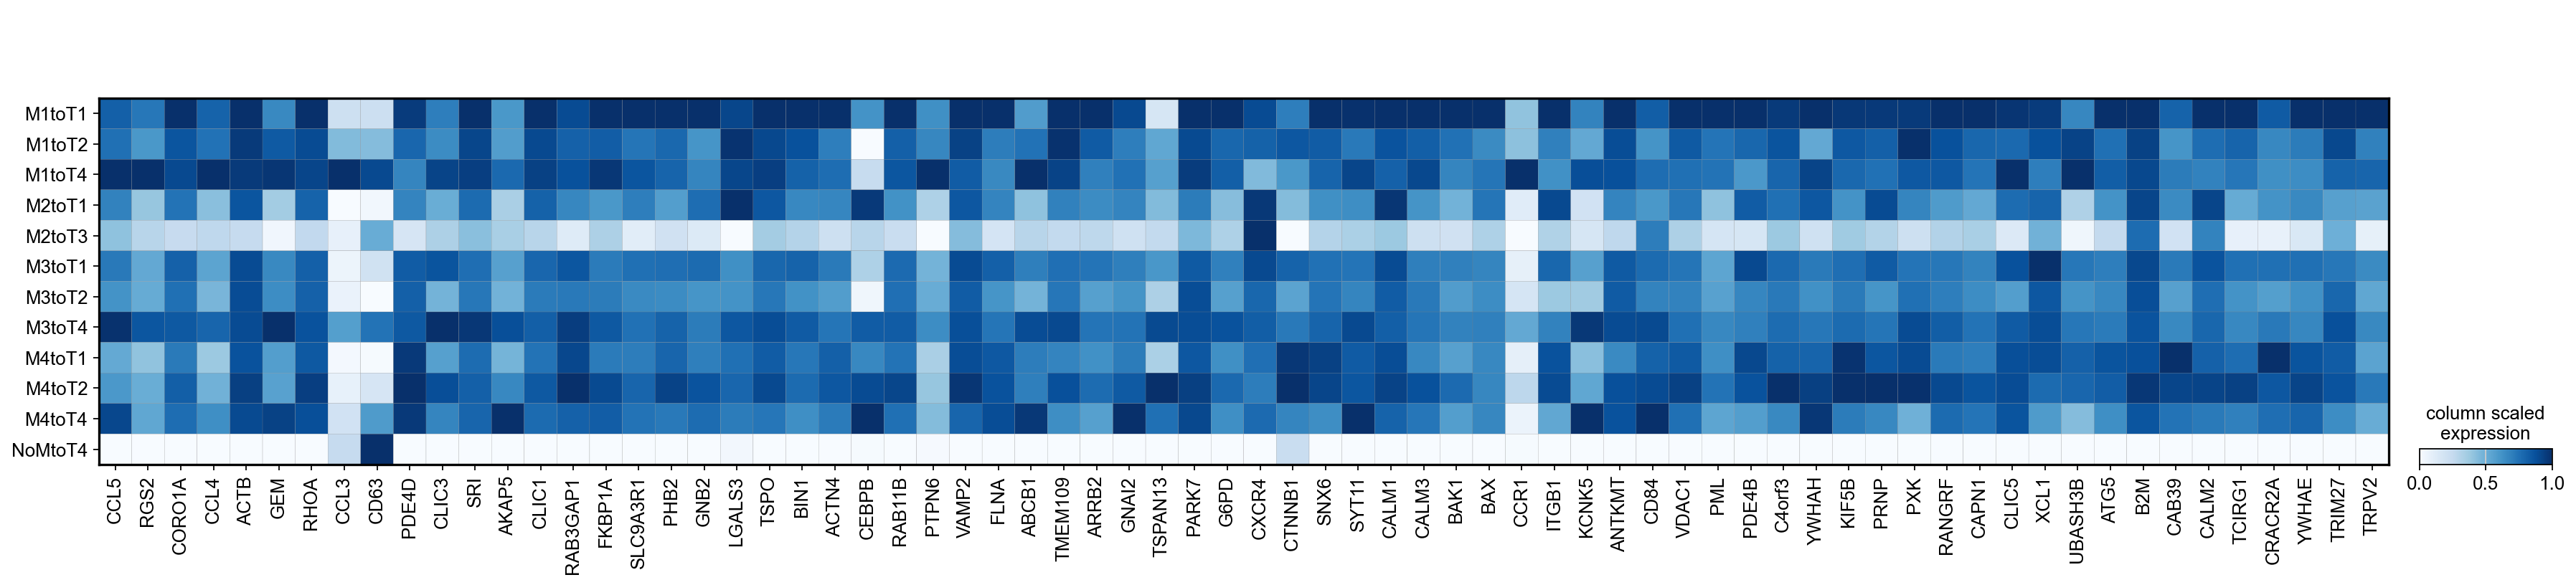

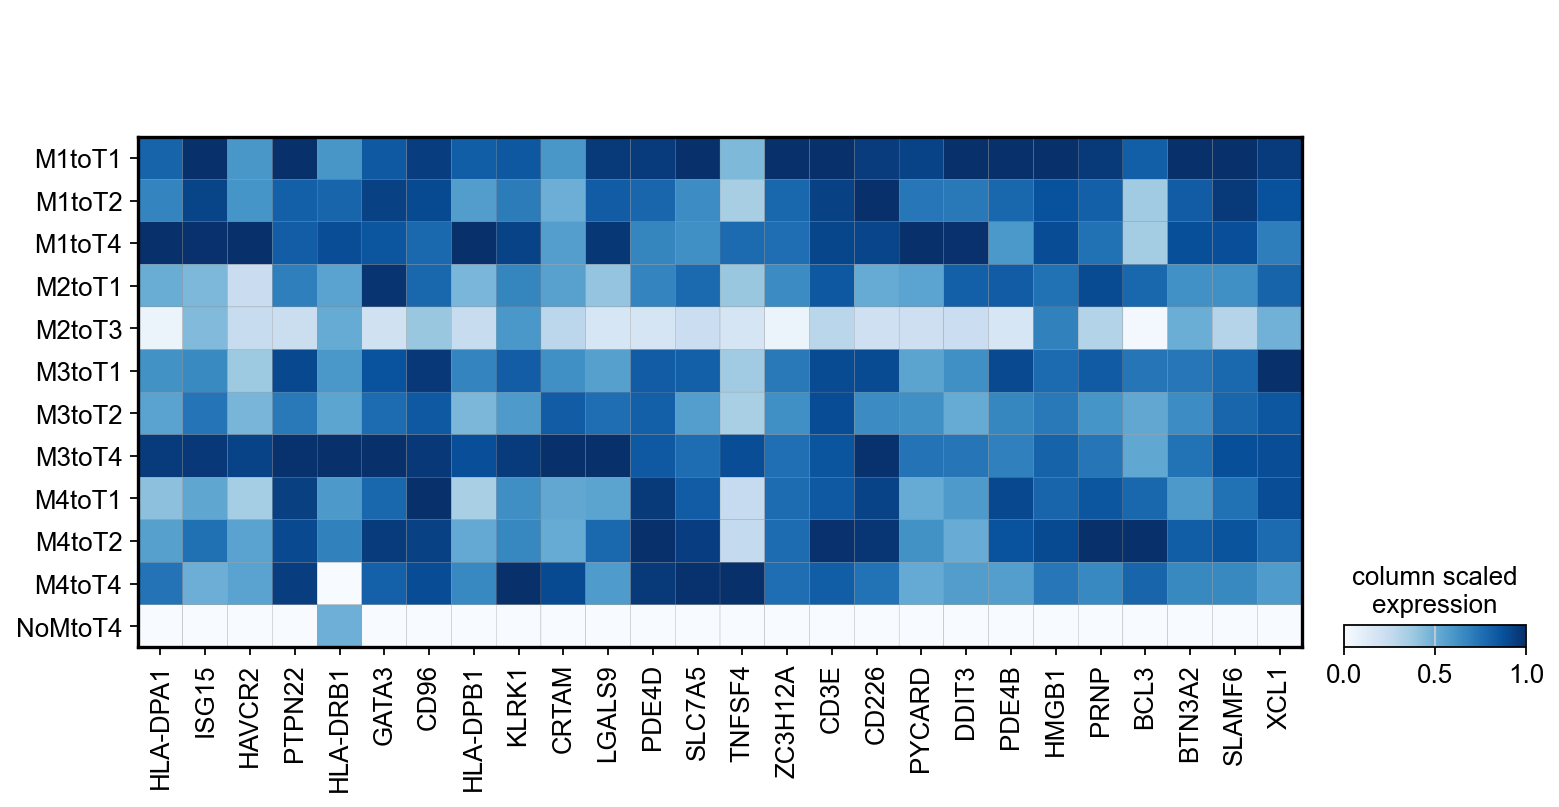

In [69]:
sc.pl.matrixplot(adata_T, FGF_response, 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')
sc.pl.matrixplot(adata_T, GOBP_VIRAL_GENOME_REPLICATION, 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')
sc.pl.matrixplot(adata_T, GOBP_REGULATION_OF_CELL_MORPHOGENESIS, 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')
sc.pl.matrixplot(adata_T, GOBP_REGULATION_OF_ION_TRANSPORT, 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')
sc.pl.matrixplot(adata_T, IFN_G_genes, 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

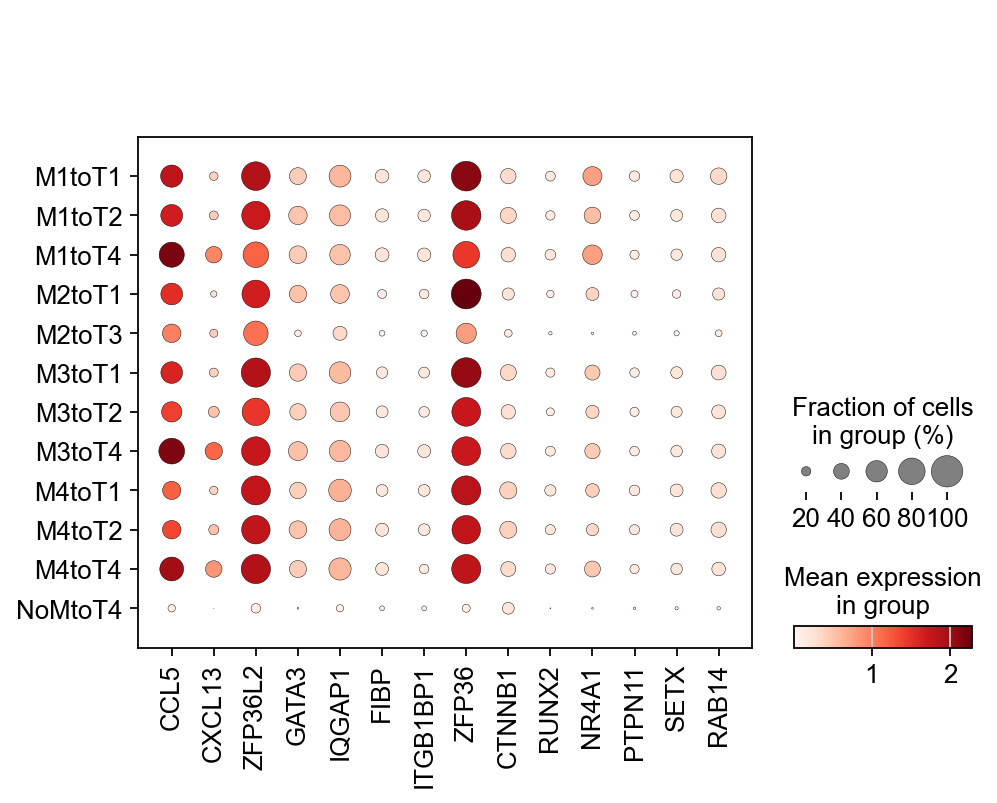

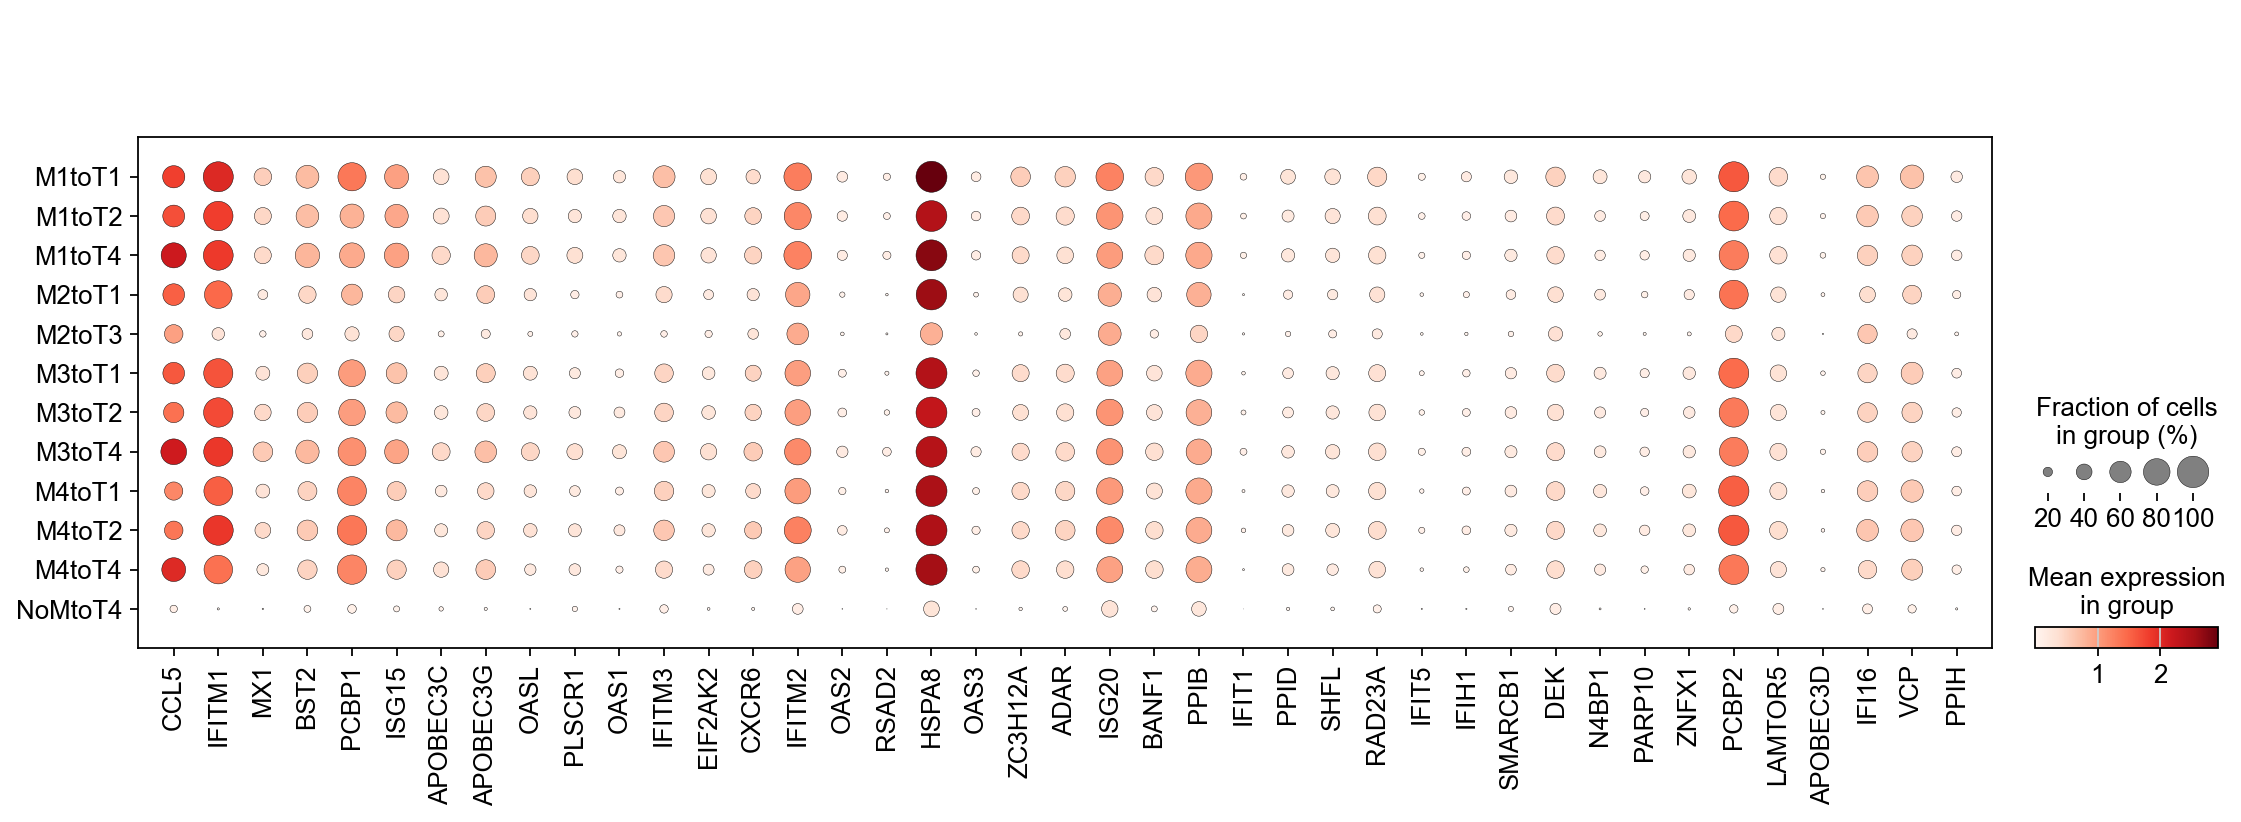

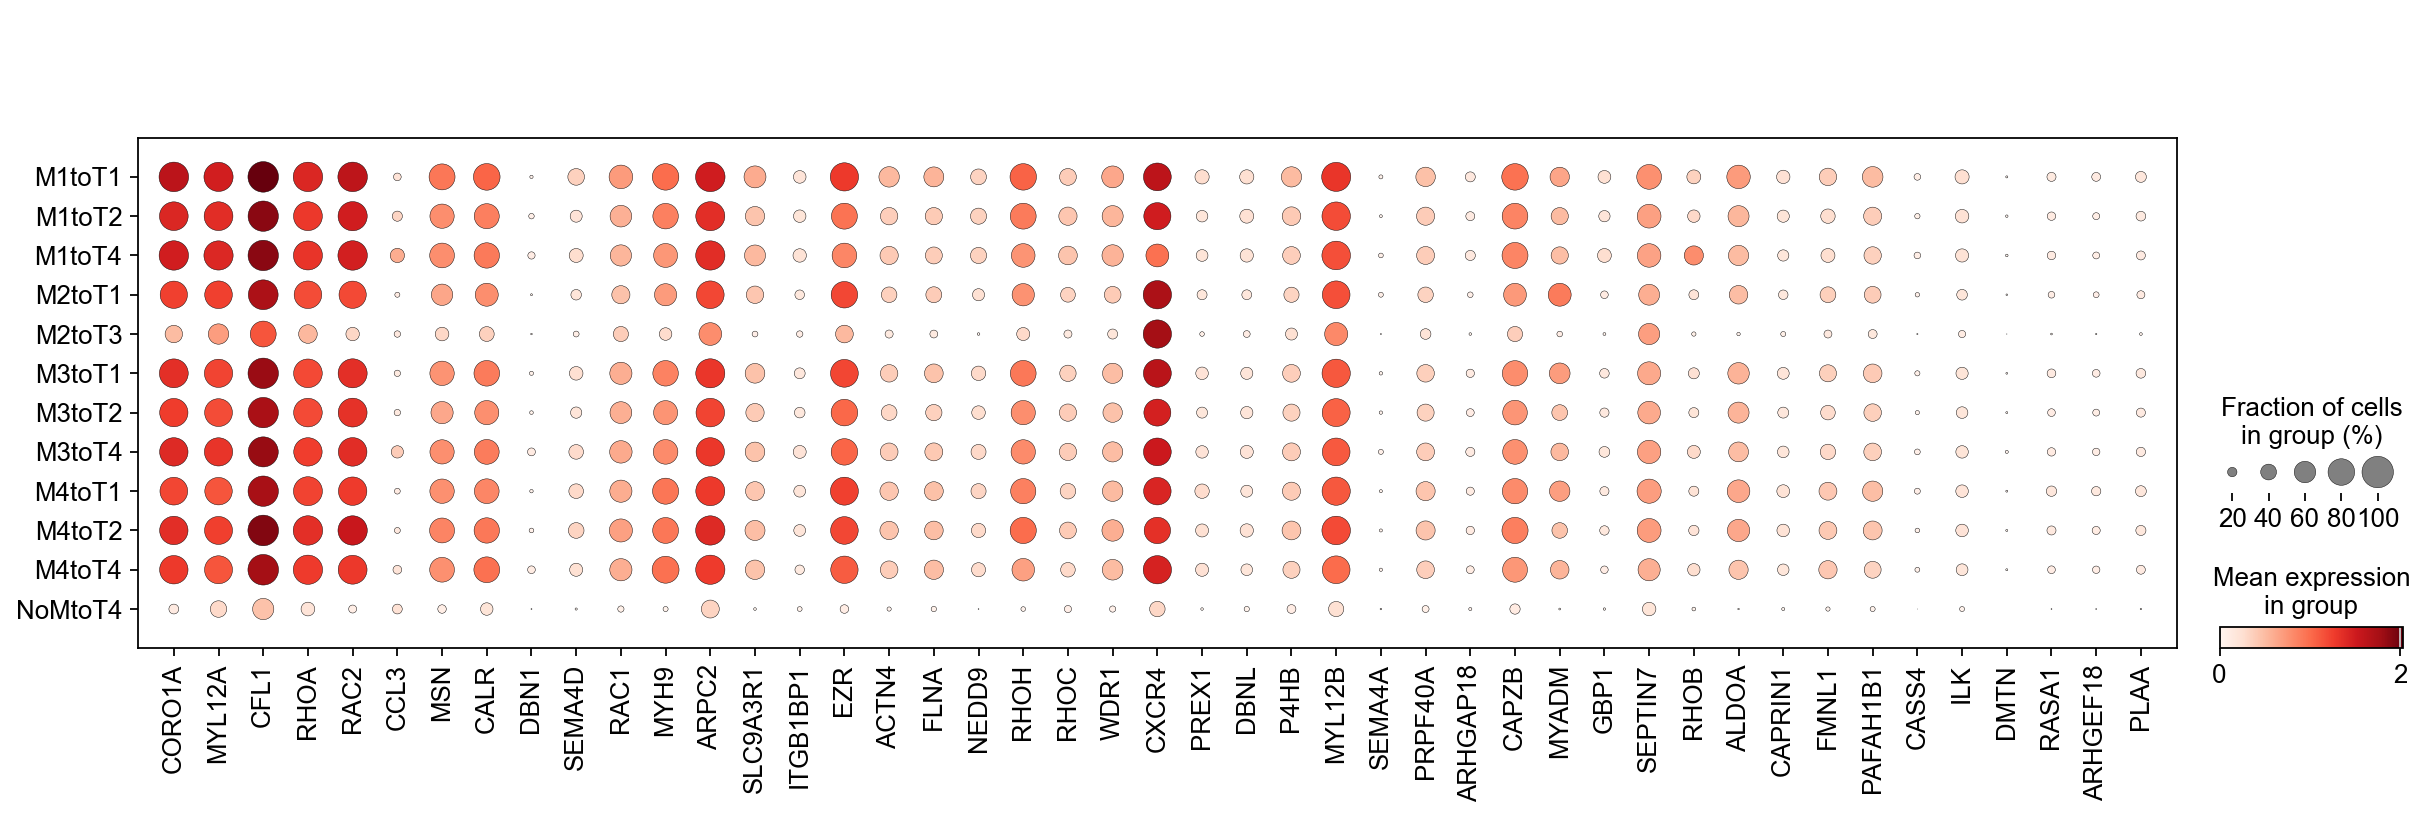

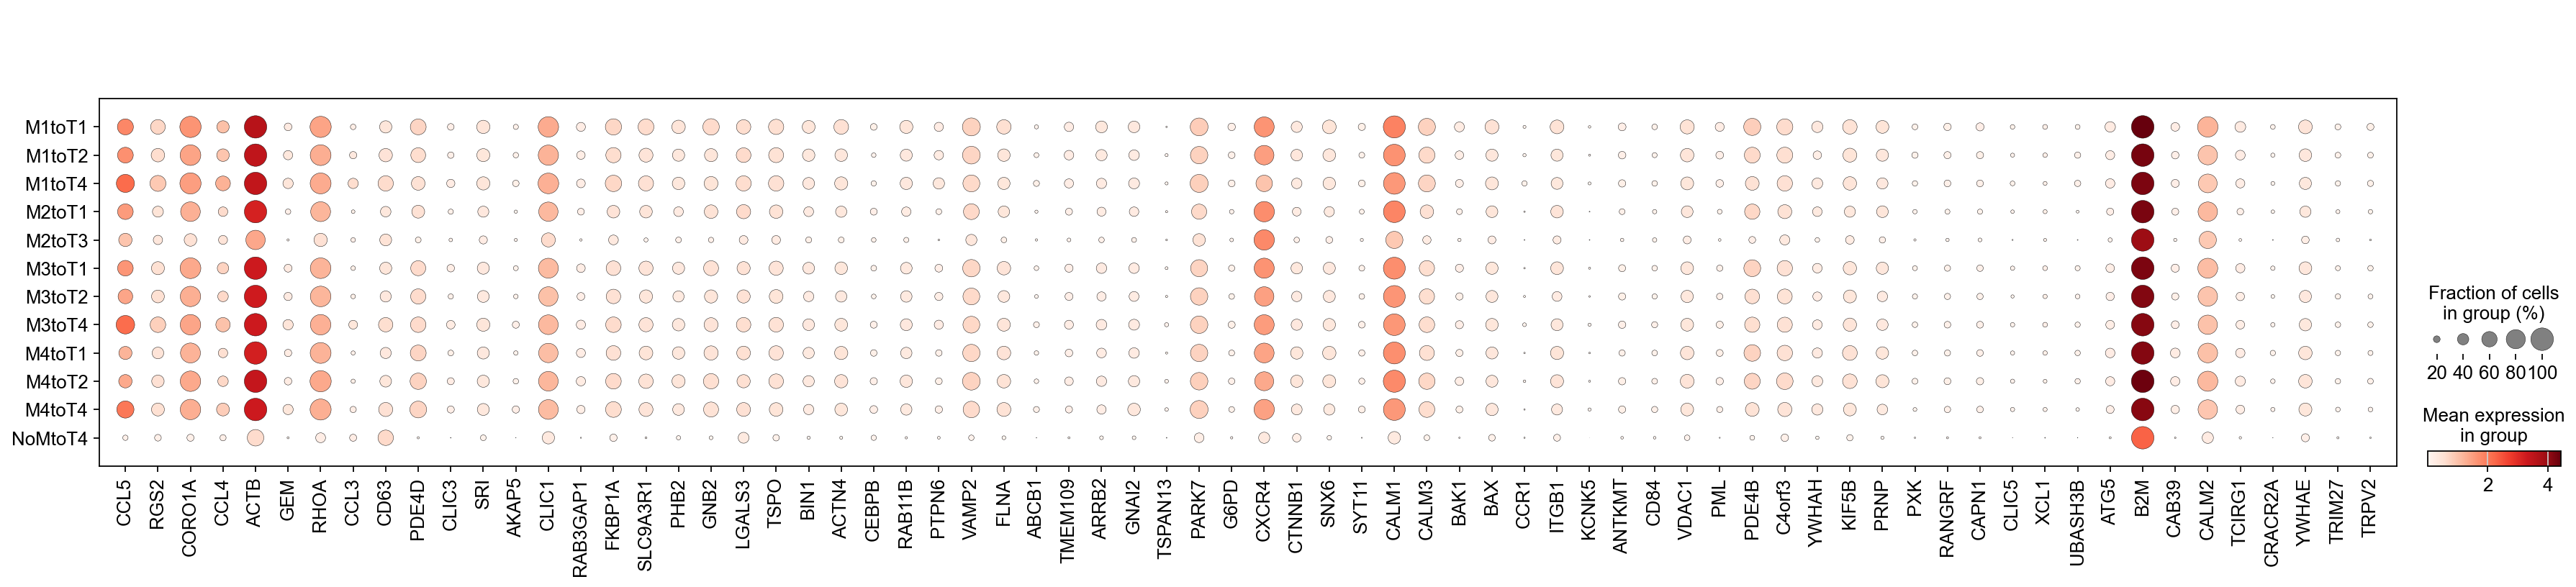

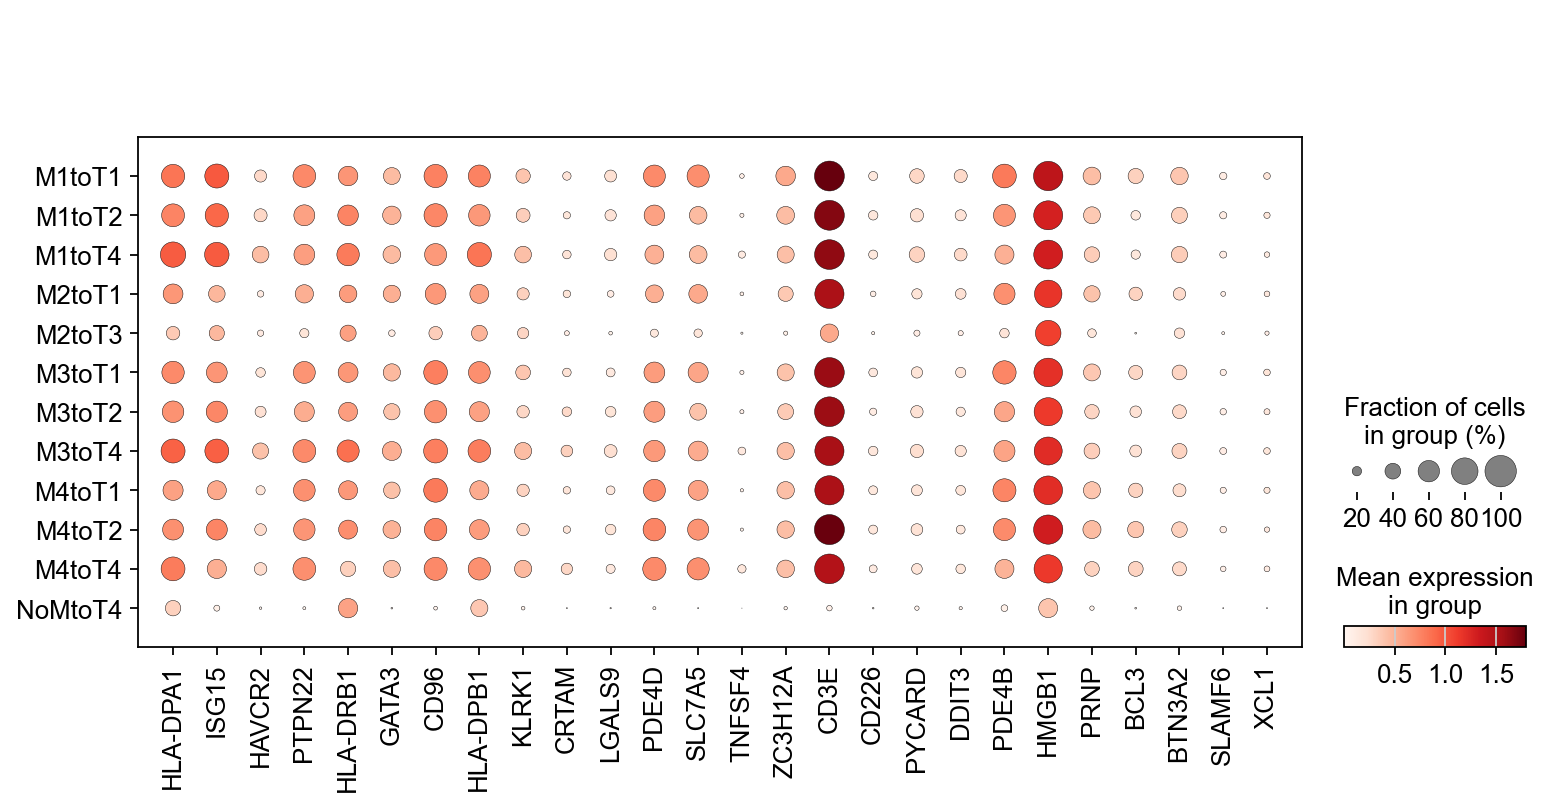

In [70]:
sc.pl.dotplot(adata_T, FGF_response, 'Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, GOBP_VIRAL_GENOME_REPLICATION, 'Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, GOBP_REGULATION_OF_CELL_MORPHOGENESIS, 'Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, GOBP_REGULATION_OF_ION_TRANSPORT, 'Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, IFN_G_genes, 'Myeloid_to_T_cluster44')

# m3t4 specific feature in REACTOME 

In [71]:
# REACTOME: M3T4 T cell + PBMC-R T cell shared
REACTOME_GLUCONEOGENESIS= ['GAPDH', 'PGK1', 'PGAM1', 'TPI1', 'MDH2', 'MDH1', 'GPI', 'SLC25A1', 'ALDOA', 'SLC25A11']
REACTOME_SEMAPHORIN_INTERACTIONS =['CFL1', 'RHOA', 'HSP90AB1', 'TLN1', 'SEMA4D', 'RAC1', 'MYH9', 'ITGA1', 'HSP90AA1', 'RHOC',
                                   'LIMK1', 'ARHGEF12', 'MYL12B', 'SEMA4A', 'ITGB1', 'ROCK1', 'RHOB']
REACTOME_PLATELET_ACTIVATION_SIGNALING_AND_AGGREGATION=['CTSW', 'CFL1', 'RHOA', 'ANXA5', 'RAC2', 'CD63', 'GNG5', 'PFN1', 'CD9',
                                                        'TLN1', 'CAP1', 'HSPA5', 'RAC1', 'LCP2', 'FAM3C', 'GNB2', 'SCCPDH', 'TUBA4A',
                                                        'ACTN4', 'GNG2', 'PTPN6', 'FLNA', 'RAP1B', 'CSK', 'CDC37L1', 'LCK', 'ARRB2',
                                                        'ENDOD1', 'GNAI2', 'FERMT3', 'WDR1', 'CD109', 'YWHAZ', 'CALM1', 'PRKCQ', 'RHOB',
                                                        'ALDOA', 'STXBP2', 'PTPN11', 'QSOX1', 'OLA1', 'APLP2', 'PECAM1', 'MAGED2']
REACTOME_CLASS_I_MHC_MEDIATED_ANTIGEN_PROCESSING_PRESENTATION=['HLA-B', 'CBLB', 'PSMB9', 'UBE2L6', 'CALR', 'PSME2', 'RBCK1', 'ERAP2', 'HERC5',
                                                               'PSME1', 'PDIA3', 'PSMB10', 'HSPA5', 'TAP1', 'PSMA1', 'PSMB8', 'SEM1', 'TAP2',
                                                               'DTX3L', 'UBE2F', 'PSMB6', 'ANAPC11', 'PSMF1', 'HERC6', 'UBB', 'RBX1', 'PSMD8',
                                                               'PSMB3', 'GLMN', 'PSMA2', 'UBE2S', 'PSMD4', 'UBE2E3', 'RNF19A', 'RNF213', 'PSMC4',
                                                               'STUB1', 'PSMA7', 'LNPEP', 'PSMA5', 'FBXO6', 'UBE2A', 'PSMD11', 'PSMC3', 'UBE3A',
                                                               'ASB2', 'FBXO7', 'PSMB2', 'HMGB1', 'TRIM21', 'PSMD3', 'PSMD7', 'CANX', 'PSMA6',
                                                               'ASB1', 'PSMD2', 'MYD88', 'DZIP3', 'PSMC1', 'UBR2', 'UBE2J1', 'UBE2D2', 'HECTD2',
                                                               'BCAP31', 'PSMD14', 'PSMC2', 'RNF34', 'B2M', 'SEC61B', 'PSMD9', 'UBE2D1', 'UBE2V1',
                                                               'KEAP1', 'FBXO44', 'RNF115', 'UBA3', 'PSMD13', 'UBE2W', 'UBA7', 'UBC', 'TAPBP', 'SOCS1',
                                                               'CTSS', 'PSMD10', 'FBXO2', 'HUWE1', 'FBXO10', 'RNF7', 'UBE2V2', 'SEC61A1', 'UBE4A', 'UBE2L3',
                                                               'PSMD12', 'RBBP6', 'FBXW2', 'IKBKG', 'PSMD6', 'NCF4', 'VAMP8', 'ZNRF1', 'FBXO31']
REACTOME_HEMOSTASIS = ['CD74', 'CTSW' ,'ACTB', 'GATA3', 'CFL1', 'RHOA', 'ANXA5', 'RAC2', 'CD63', 'GNG5', 'SLC7A5', 'PFN1',
                       'SIRPG', 'CD9', 'TLN1', 'SRI', 'CAP1', 'CD99', 'HSPA5', 'RAC1', 'LCP2', 'SLC3A2', 'JAML', 'FAM3C', 'GNB2',
                       'TUBA1A', 'SCCPDH', 'TUBA4A', 'ACTN4', 'GNG2', 'PTPN6', 'ITGA1', 'FLNA', 'KIF21A', 'RAP1B', 'CSK', 'DOCK8',
                       'CDC37L1', 'LCK', 'ARRB2', 'ENDOD1', 'GNAI2', 'FERMT3', 'IRF1', 'WDR1', 'TUBA1B', 'CD109', 'PPP2R1A', 'YWHAZ',
                       'CALM1', 'PRKCQ', 'TUBB4B', 'ITGA4', 'DOK2', 'ITGB1', 'CAPZB', 'BSG', 'CAPZA1', 'PRKACB', 'CD84', 'RHOB', 'SLC16A3',
                       'IGLV3-1', 'ALDOA', 'STXBP2', 'PTPN11', 'KIF5B', 'PRKAR1B', 'ITGA2', 'QSOX1', 'OLA1', 'KIF3A', 'APLP2', 'PPP2CA',
                       'PECAM1', 'MAGED2', 'ITPK1', 'DGKZ', 'IRF2', 'KIF20B']

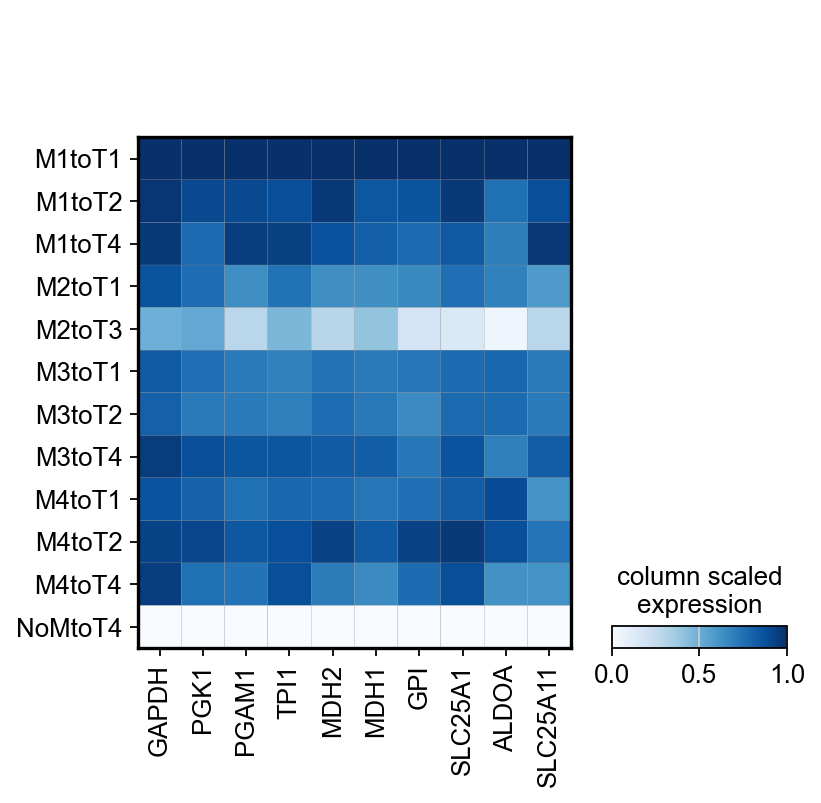

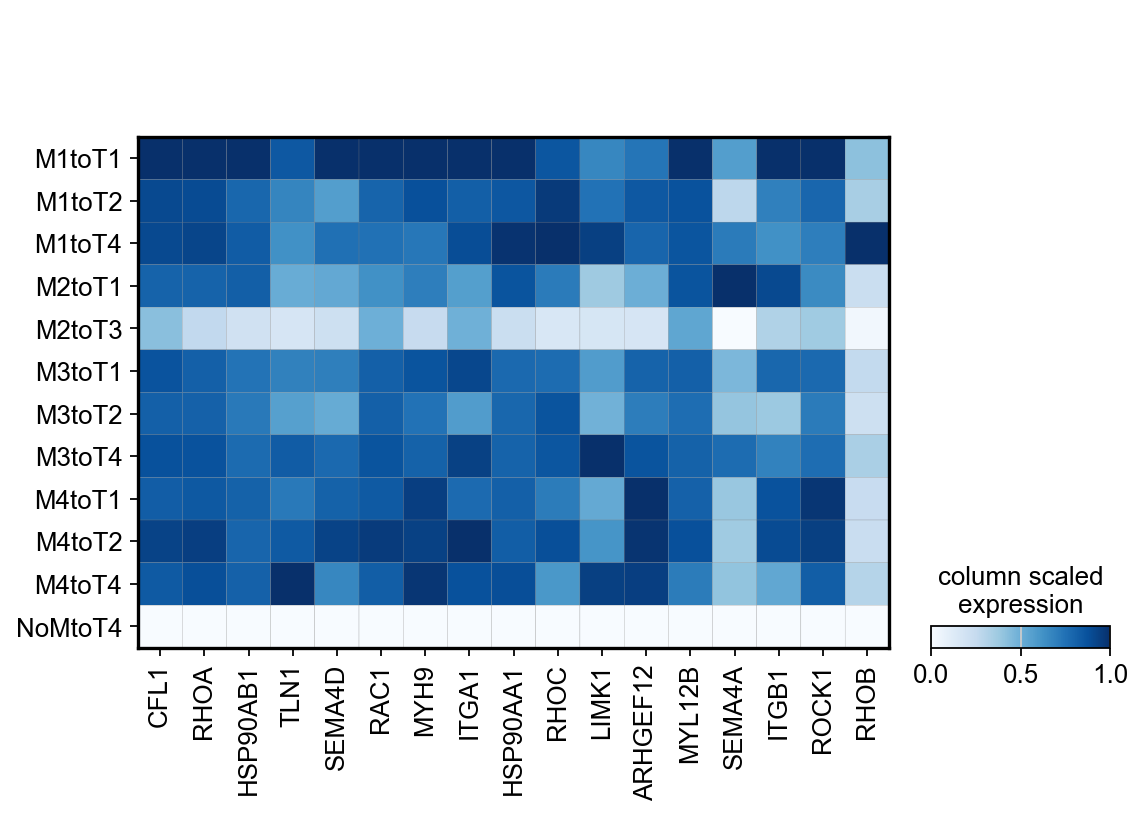

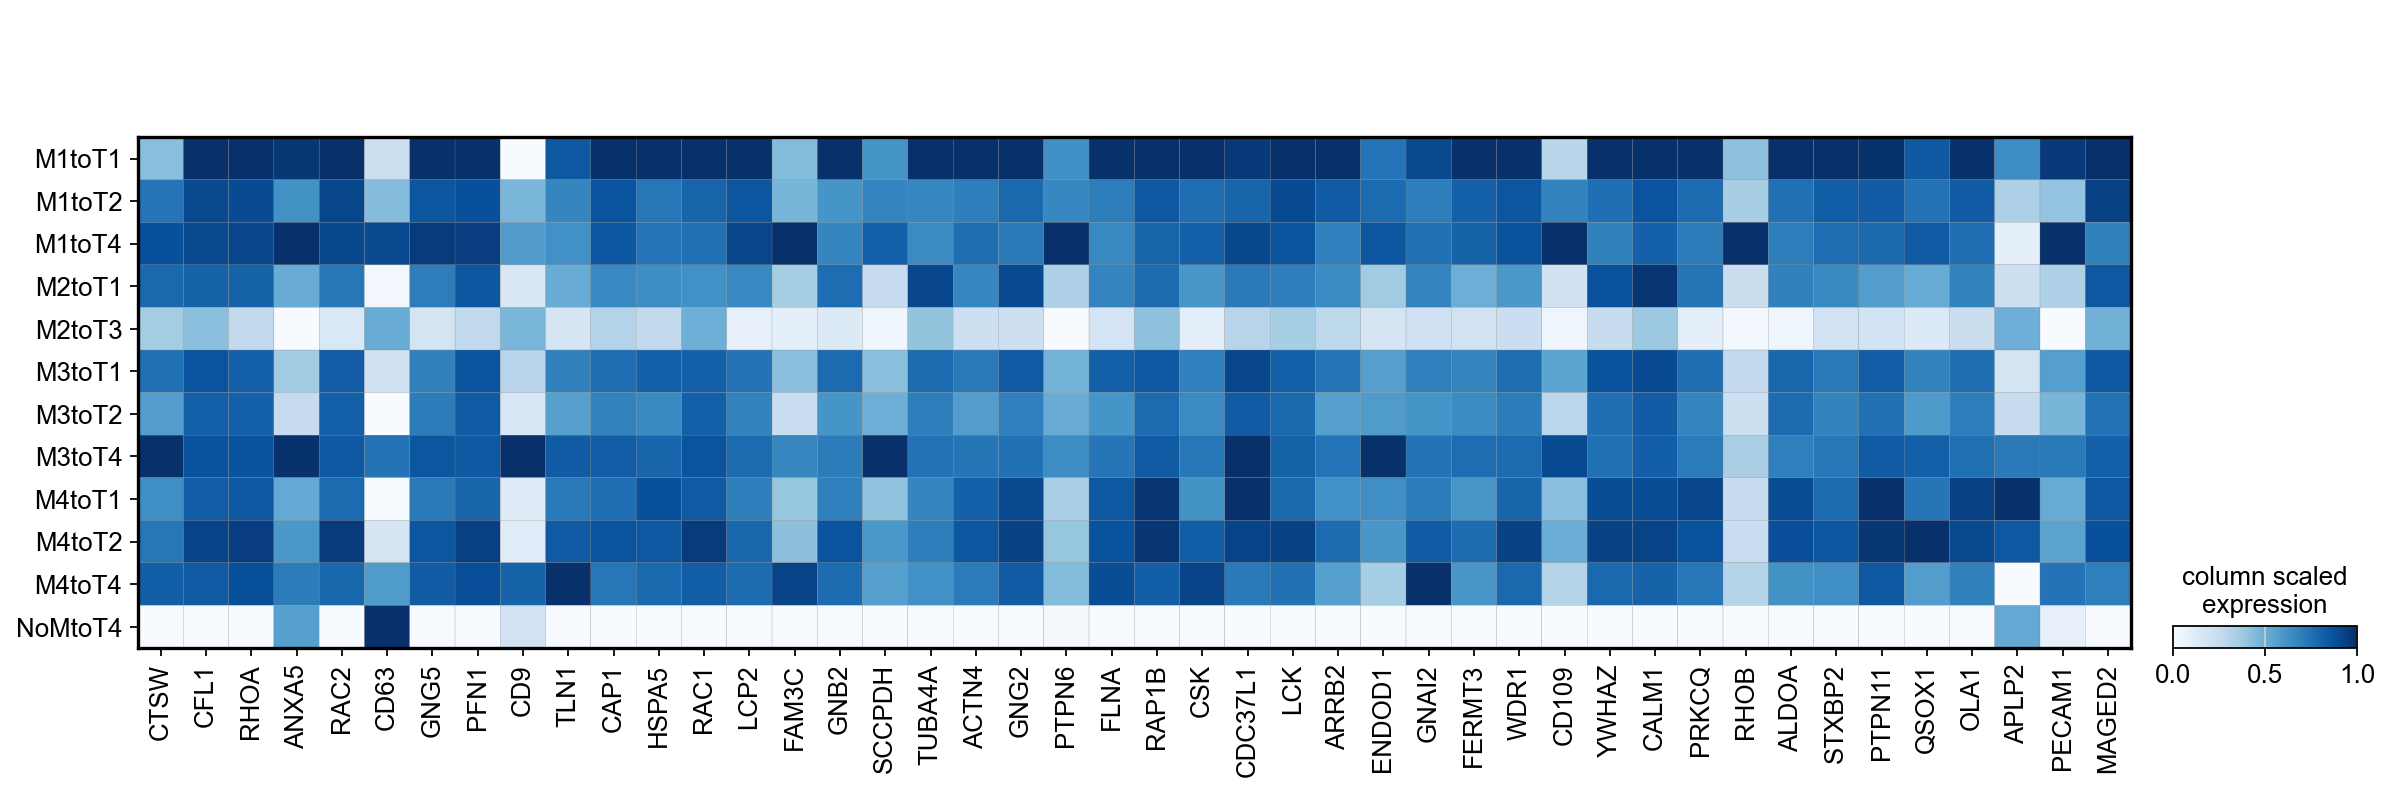

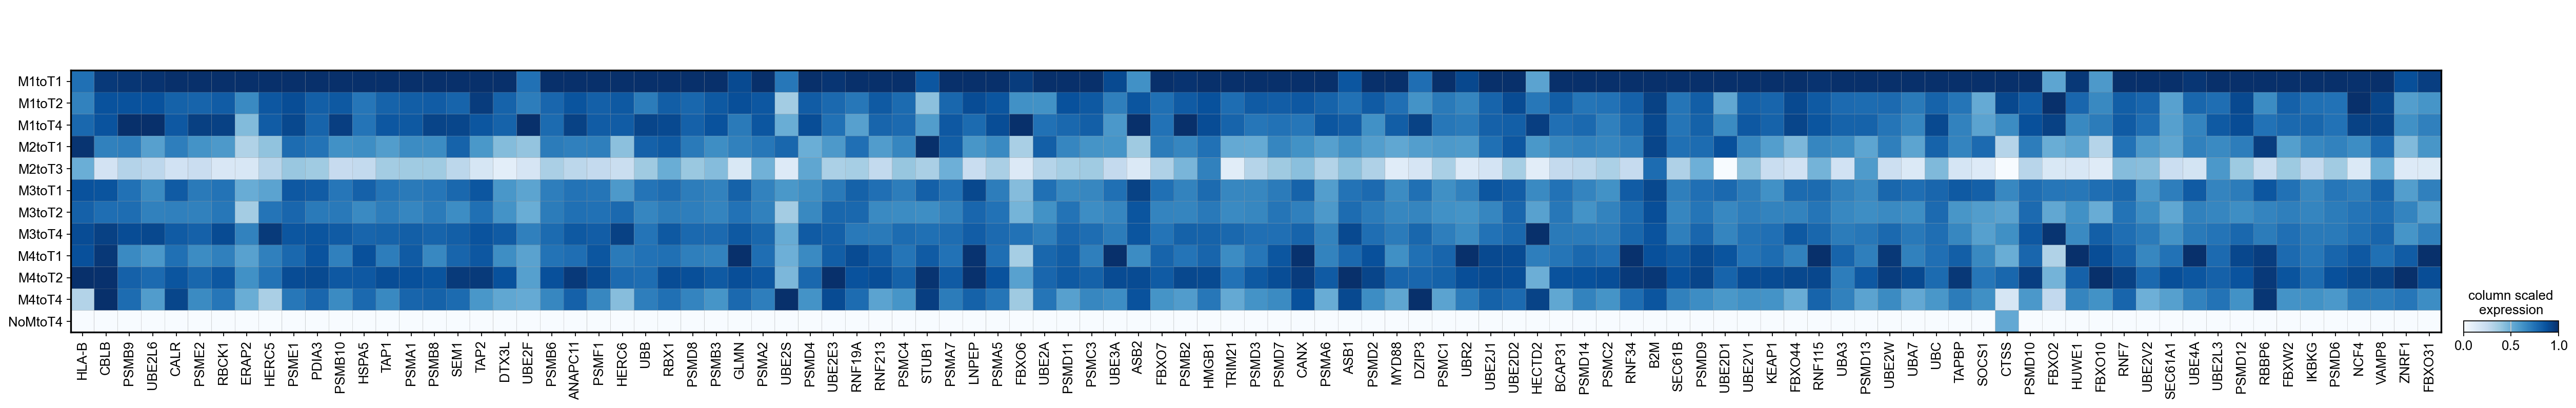

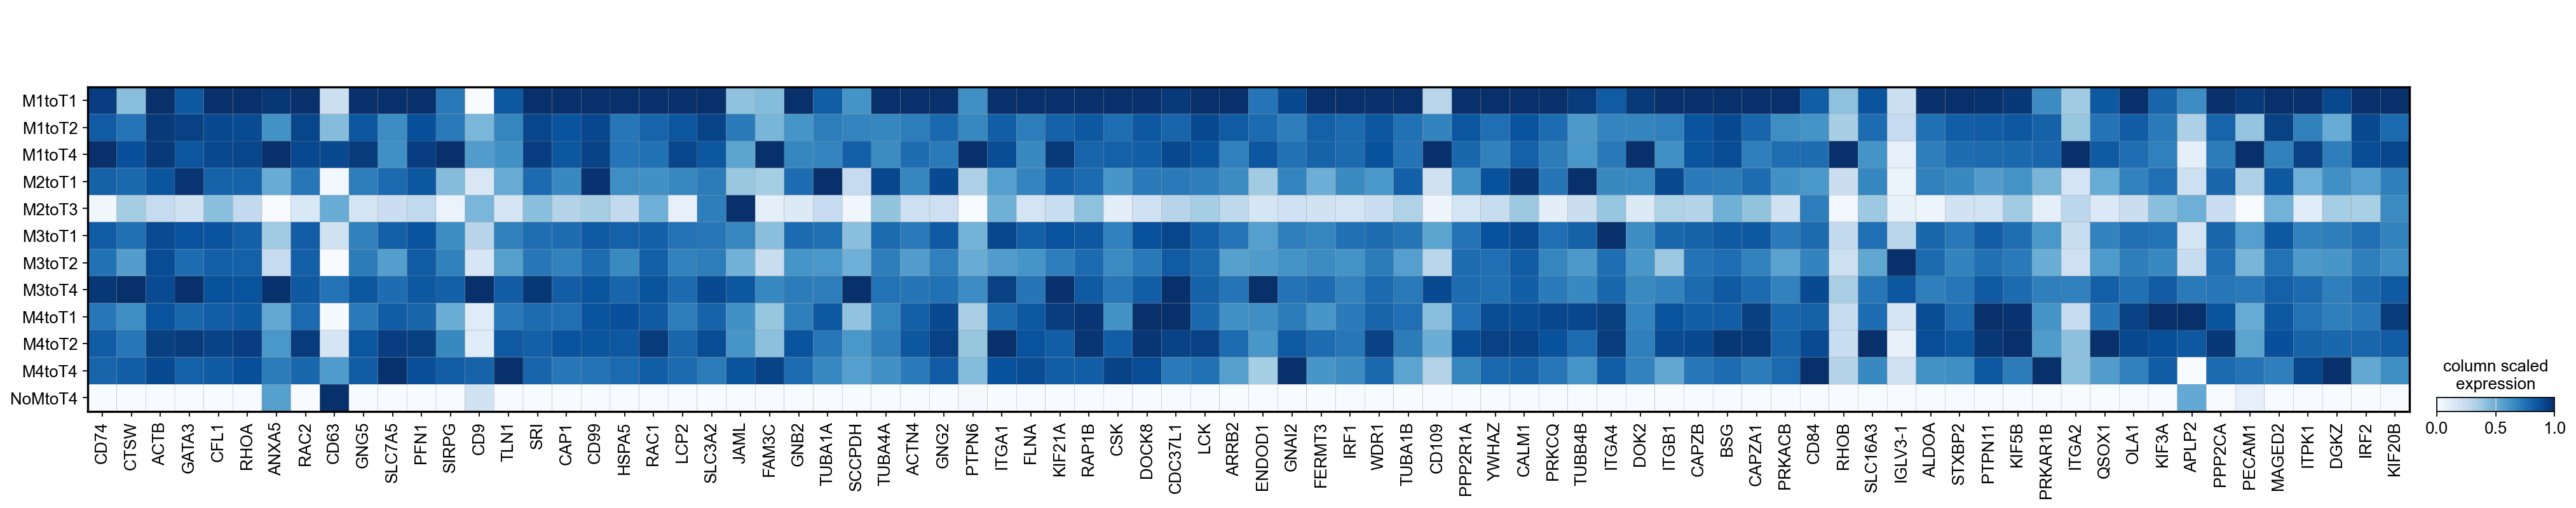

In [72]:
sc.pl.matrixplot(adata_T, REACTOME_GLUCONEOGENESIS, 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')
sc.pl.matrixplot(adata_T, REACTOME_SEMAPHORIN_INTERACTIONS, 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')
sc.pl.matrixplot(adata_T, REACTOME_PLATELET_ACTIVATION_SIGNALING_AND_AGGREGATION, 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')
sc.pl.matrixplot(adata_T, REACTOME_CLASS_I_MHC_MEDIATED_ANTIGEN_PROCESSING_PRESENTATION, 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')
sc.pl.matrixplot(adata_T, REACTOME_HEMOSTASIS, 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

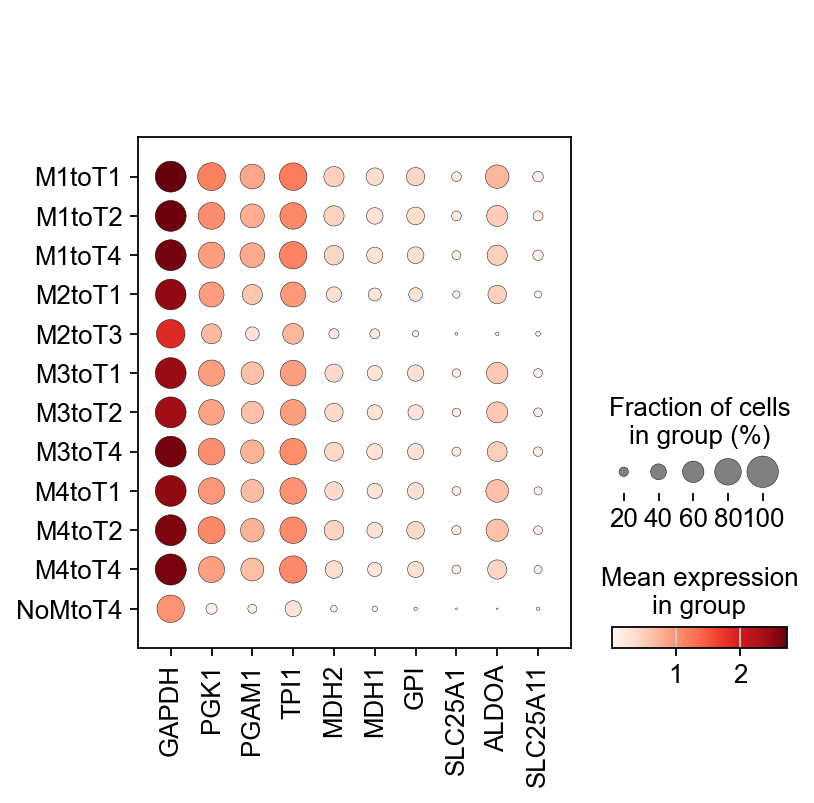

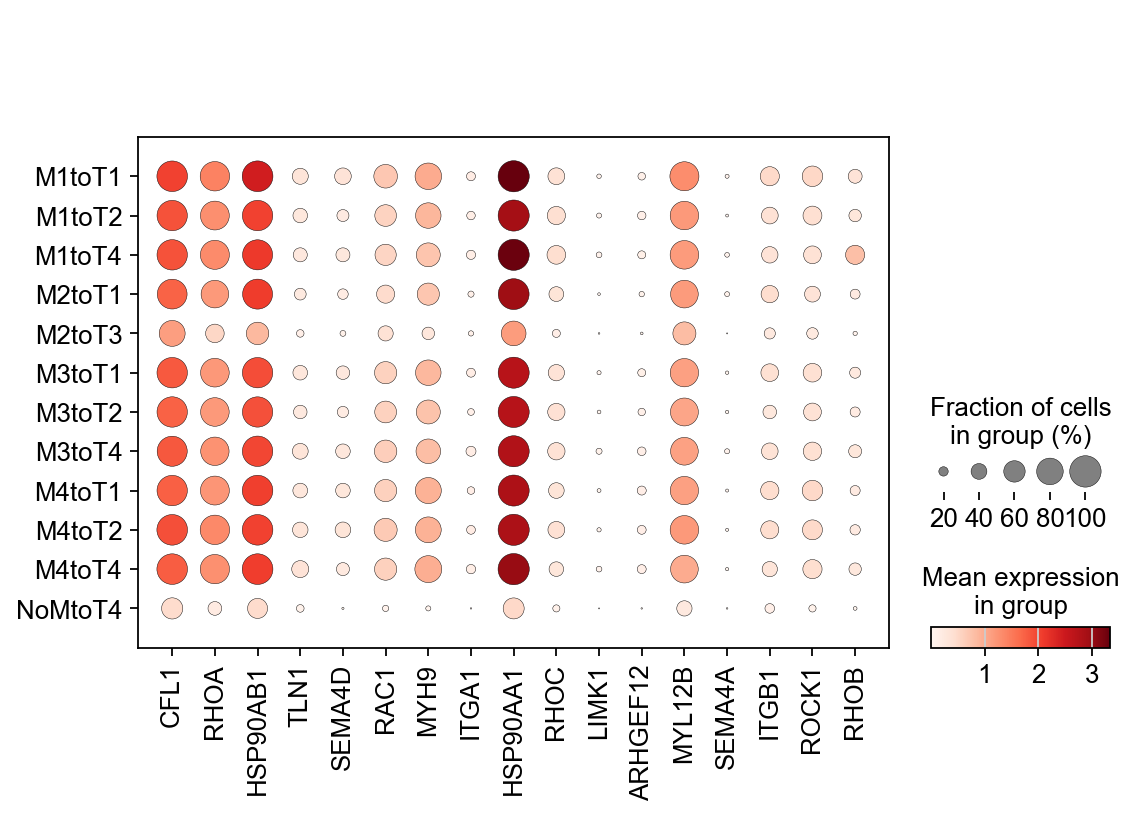

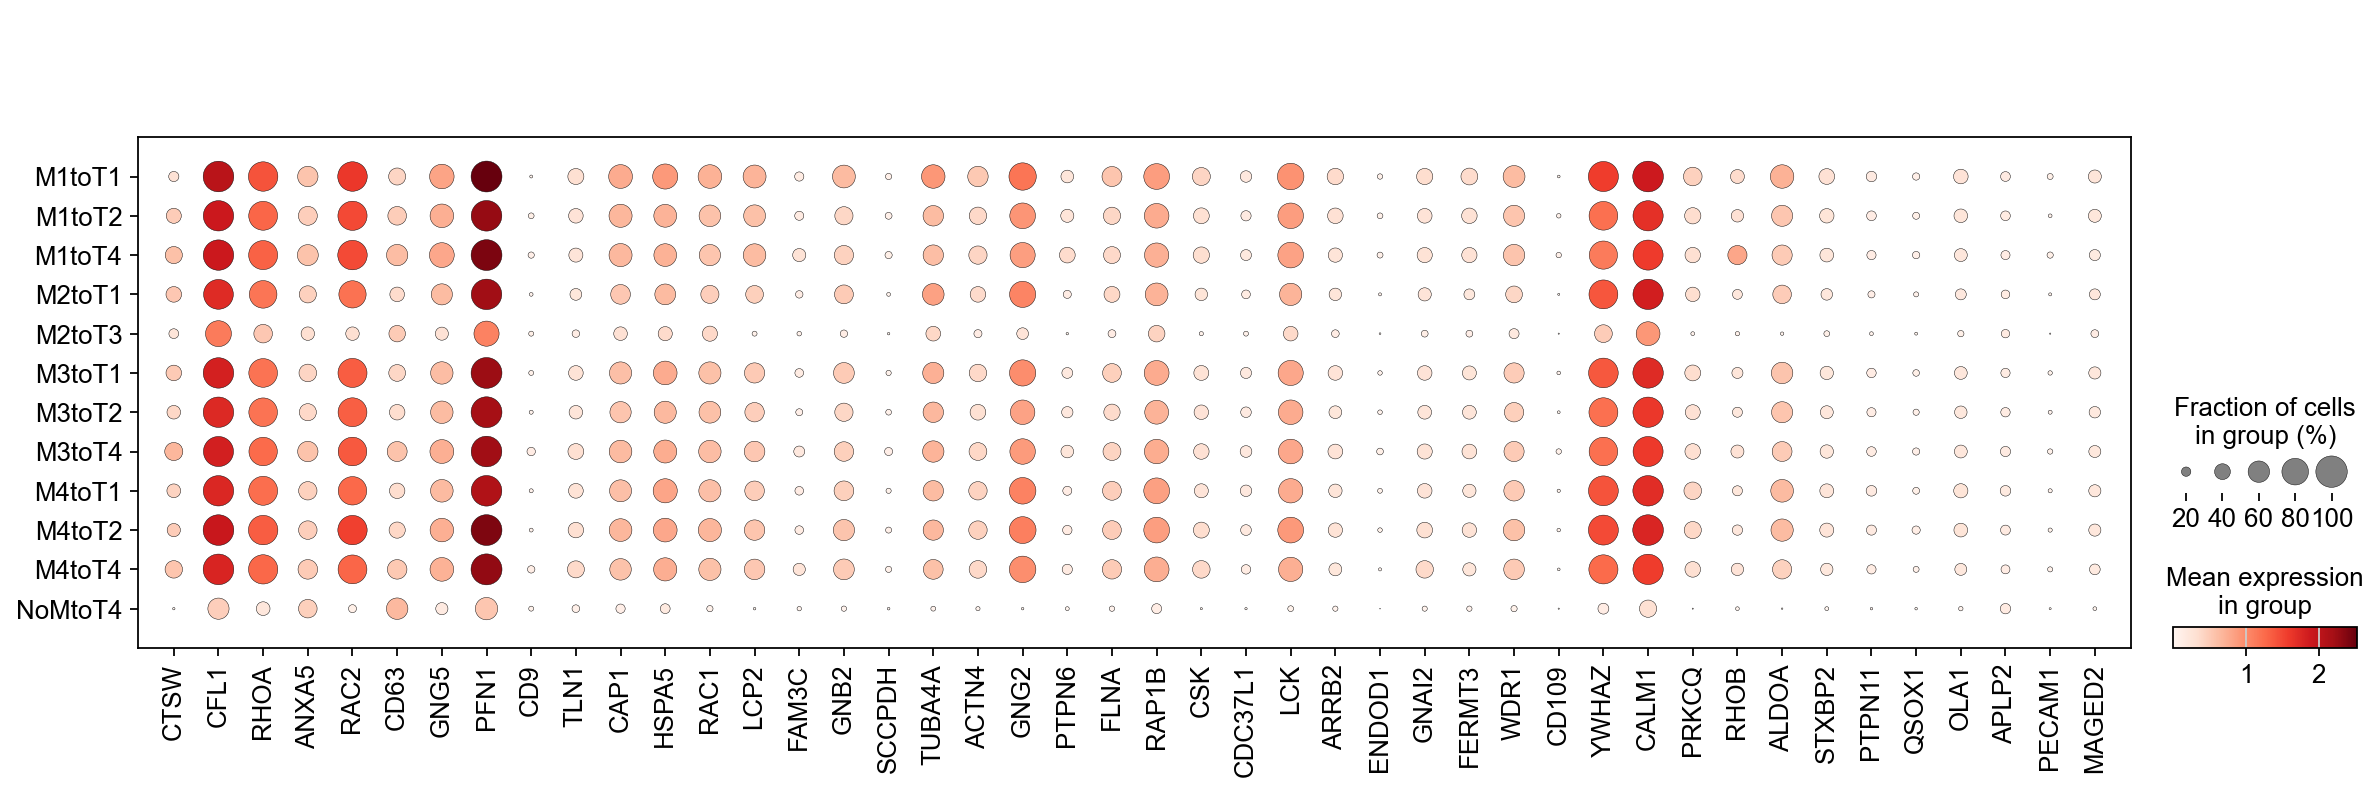

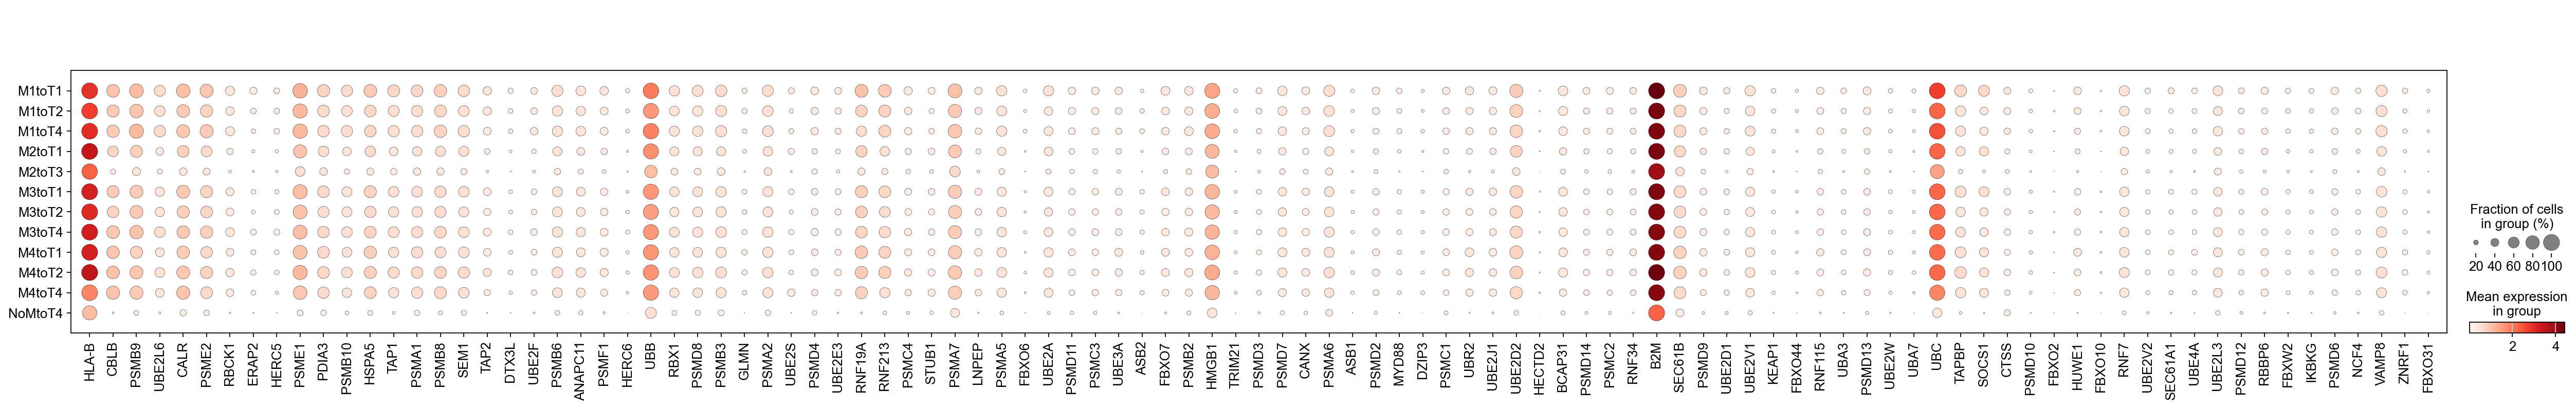

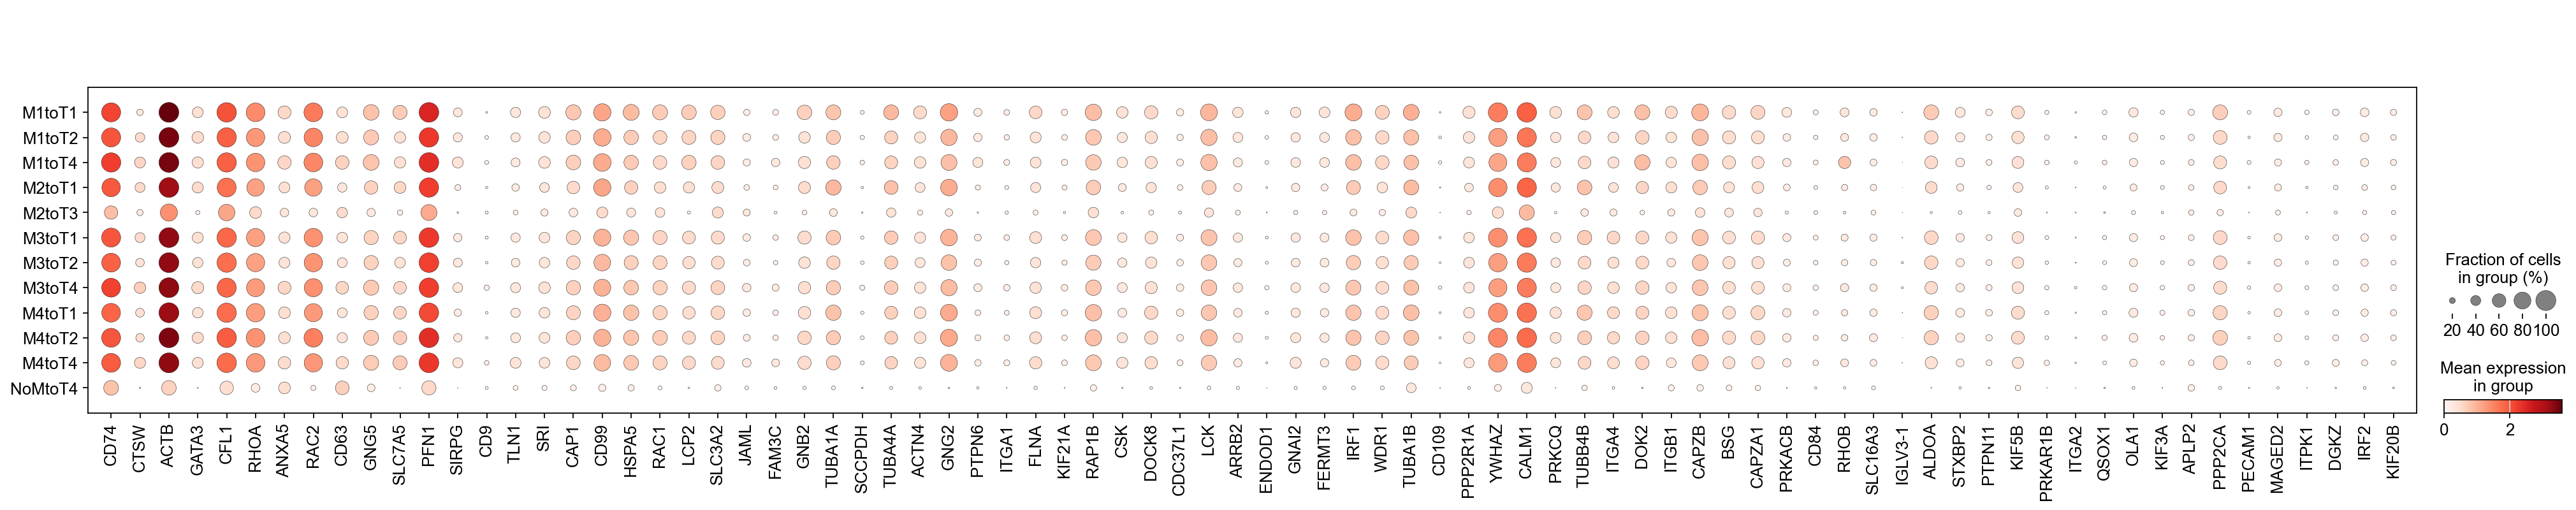

In [73]:
sc.pl.dotplot(adata_T, REACTOME_GLUCONEOGENESIS, 'Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, REACTOME_SEMAPHORIN_INTERACTIONS, 'Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, REACTOME_PLATELET_ACTIVATION_SIGNALING_AND_AGGREGATION, 'Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, REACTOME_CLASS_I_MHC_MEDIATED_ANTIGEN_PROCESSING_PRESENTATION, 'Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, REACTOME_HEMOSTASIS, 'Myeloid_to_T_cluster44')

In [26]:
#Reference : Maayanlab, REACTOME
PD1_genes = ['CD247','CD274','CD3D','CD3E','CD3G','CD4','CSK','HLA-DPA1','HLA-DPB1','HLA-DQA1','HLA-DQA2','HLA-DQB1','HLA-DQB2',
            'HLA-DRA','HLA-DRB1','HLA-DRB3','HLA-DRB4','HLA-DRB5','LCK','PDCD1']

IFN_genes = ["IFIT3",	"IRF4",	"IRF9",	"IRF2",	"IRF7",	"IRF6",	"IRF1",	"IRF5",	"IRF8",	"IRF3",	"IFI6",	"SAMHD1",	"EGR1",	"OAS2",	"OAS1",	"OAS3",	"OASL",	"BST2",	"ADAR",	"ISG20",	"IFI27",	"IP6K2",	"IFITM3",	"ISG15",	"RNASEL",	"XAF1",	"RSAD2",	"IFI35",	"HLA-H",	"HLA-G",	"HLA-B",	"HLA-F",	"HLA-E",	"HLA-A",	"HLA-C",	"IFIT5",	"GBP2",	"IFIT1",	"PSMB8",	"IFITM1",	"IFIT2",	"IFITM2",	"MX2",	"MX1",	"SMAD7",	"B2M",	"FCGR1B",	"FCGR1A",	"PML",	"PTAFR",	"MT2A",	"SP100",	"NCAM1",	"CD44",	"VCAM1",	"ICAM1",	"IFI30",	"GBP5",	"GBP3",	"GBP6",	"GBP7",	"GBP4",	"GBP1",	"HLA-DQA1",	"HLA-DPA1",	"HLA-DQB2",	"HLA-DRB3",	"HLA-DRB1",	"HLA-DRA",	"HLA-DQB1",	"HLA-DRB4",	"HLA-DQA2",	"HLA-DPB1",	"HLA-DRB5",	"CIITA",	"TRIM29",	"TRIM35",	"TRIM46",	"TRIM45",	"TRIM2",	"TRIM10",	"TRIM14",	"TRIM48",	"TRIM6",	"TRIM17",	"TRIM3",	"TRIM38",	"TRIM22",	"TRIM31",	"TRIM68",	"TRIM62",	"TRIM34",	"TRIM26",	"TRIM25",	"TRIM5",	"MID1",	"TRIM8",	"TRIM21"
]

IL_genes =["AGER",	"AIP",	"AKT1",	"ALOX15",	"ALOX5",	"ALPK1",	"ANXA1",	"ANXA2",	"APP",	"ARF1",	"ATF1",	"ATF2",	"BATF",	"BCL2",	"BCL2L1",	"BCL6",	"BIRC5",	"BLNK",	"BOLA2",	"BOLA2B",	"BRWD1",	"BTRC",	"CA1",	"CANX",	"CAPZA1",	"CASP1",	"CASP3",	"CASP8",	"CBL",	"CCL11",	"CCL19",	"CCL2",	"CCL20",	"CCL22",	"CCL3",	"CCL3L1",	"CCL3L3",	"CCL4",	"CCL5",	"CCND1",	"CCR1",	"CCR2",	"CCR5",	"CD36",	"CD4",	"CD80",	"CD86",	"CDC42",	"CDKN1A",	"CEBPD",	"CFL1",	"CHUK",	"CISH",	"CLCF1",	"CNN2",	"CNTF",	"CNTFR",	"COL1A2",	"CREB1",	"CRK",	"CRKL",	"CRLF1",	"CRLF2",	"CSF1",	"CSF1R",	"CSF2",	"CSF2RA",	"CSF2RB",	"CSF3",	"CSF3R",	"CTF1",	"CTSG",	"CUL1",	"CXCL1",	"CXCL10",	"CXCL2",	"CXCL8",	"DUSP3",	"DUSP4",	"DUSP6",	"DUSP7",	"EBI3",	"ELK1",	"F13A1",	"FASLG",	"FBXW11",	"FCER2",	"FGF2",	"FN1",	"FOS",	"FOXO1",	"FOXO3",	"FPR1",	"FSCN1",	"FYN",	"GAB2",	"GATA3",	"GRB2",	"GSDMD",	"GSTA2",	"GSTO1",	"H3C1",	"H3C10",	"H3C11",	"H3C12",	"H3C13",	"H3C14",	"H3C15",	"H3C2",	"H3C3",	"H3C4",	"H3C6",	"H3C7",	"H3C8",	"HAVCR2",	"HCK",	"HGF",	"HIF1A",	"HMGB1",	"HMOX1",	"HNRNPA2B1",	"HNRNPDL",	"HNRNPF",	"HSP90AA1",	"HSP90B1",	"HSPA8",	"HSPA9",	"ICAM1",	"IFNG",	"IFNL1",	"IFNL2",	"IFNL3",	"IFNLR1",	"IGHE",	"IGHG1",	"IGHG4",	"IKBIP",	"IKBKB",	"IKBKG",	"IL10",	"IL10RA",	"IL10RB",	"IL11",	"IL11RA",	"IL12A",	"IL12B",	"IL12RB1",	"IL12RB2",	"IL13",	"IL13RA1",	"IL13RA2",	"IL15",	"IL15RA",	"IL16",	"IL17A",	"IL17C",	"IL17F",	"IL17RA",	"IL17RB",	"IL17RC",	"IL17RE",	"IL18",	"IL18BP",	"IL18R1",	"IL18RAP",	"IL19",	"IL1A",	"IL1B",	"IL1F10",	"IL1R1",	"IL1R2",	"IL1RAP",	"IL1RAPL1",	"IL1RL1",	"IL1RL2",	"IL1RN",	"IL2",	"IL20",	"IL20RA",	"IL20RB",	"IL21",	"IL21R",	"IL22",	"IL22RA1",	"IL22RA2",	"IL23A",	"IL23R",	"IL24",	"IL25",	"IL26",	"IL27",	"IL27RA",	"IL2RA",	"IL2RB",	"IL2RG",	"IL3",	"IL31",	"IL31RA",	"IL32",	"IL33",	"IL34",	"IL36A",	"IL36B",	"IL36G",	"IL36RN",	"IL37",	"IL3RA",	"IL4",	"IL4R",	"IL5",	"IL5RA",	"IL6",	"IL6R",	"IL6ST",	"IL7",	"IL7R",	"IL9",	"IL9R",	"INPP5D",	"INPPL1",	"IRAK1",	"IRAK2",	"IRAK3",	"IRAK4",	"IRF4",	"IRS1",	"IRS2",	"ITGAM",	"ITGAX",	"ITGB1",	"ITGB2",	"JAK1",	"JAK2",	"JAK3",	"JUN",	"JUNB",	"LAMA5",	"LBP",	"LCK",	"LCN2",	"LCP1",	"LGALS9",	"LIF",	"LIFR",	"LMNB1",	"LRRC14",	"LYN",	"MAOA",	"MAP2K1",	"MAP2K3",	"MAP2K4",	"MAP2K6",	"MAP2K7",	"MAP3K3",	"MAP3K7",	"MAP3K8",	"MAPK1",	"MAPK10",	"MAPK11",	"MAPK14",	"MAPK3",	"MAPK7",	"MAPK8",	"MAPK9",	"MAPKAPK2",	"MAPKAPK3",	"MCL1",	"MEF2A",	"MEF2C",	"MIF",	"MMP1",	"MMP2",	"MMP3",	"MMP9",	"MSN",	"MTAP",	"MUC1",	"MYC",	"MYD88",	"N4BP1",	"NANOG",	"NDN",	"NFKB1",	"NFKB2",	"NFKBIA",	"NFKBIB",	"NKIRAS1",	"NKIRAS2",	"NLRC5",	"NLRX1",	"NOD1",	"NOD2",	"NOS2",	"OPRD1",	"OPRM1",	"OSM",	"OSMR",	"P4HB",	"PAK2",	"PDCD4",	"PELI1",	"PELI2",	"PELI3",	"PIK3CA",	"PIK3CB",	"PIK3CD",	"PIK3R1",	"PIK3R2",	"PIK3R3",	"PIM1",	"PITPNA",	"POMC",	"POU2F1",	"PPIA",	"PPP2CA",	"PPP2CB",	"PPP2R1A",	"PPP2R1B",	"PPP2R5D",	"PRKACA",	"PRTN3",	"PSMA1",	"PSMA2",	"PSMA3",	"PSMA4",	"PSMA5",	"PSMA6",	"PSMA7",	"PSMA8",	"PSMB1",	"PSMB10",	"PSMB11",	"PSMB2",	"PSMB3",	"PSMB4",	"PSMB5",	"PSMB6",	"PSMB7",	"PSMB8",	"PSMB9",	"PSMC1",	"PSMC2",	"PSMC3",	"PSMC4",	"PSMC5",	"PSMC6",	"PSMD1",	"PSMD10",	"PSMD11",	"PSMD12",	"PSMD13",	"PSMD14",	"PSMD2",	"PSMD3",	"PSMD4",	"PSMD5",	"PSMD6",	"PSMD7",	"PSMD8",	"PSMD9",	"PSME1",	"PSME2",	"PSME3",	"PSME4",	"PSMF1",	"PTAFR",	"PTGS2",	"PTK2B",	"PTPN11",	"PTPN12",	"PTPN13",	"PTPN14",	"PTPN18",	"PTPN2",	"PTPN20",	"PTPN23",	"PTPN4",	"PTPN5",	"PTPN6",	"PTPN7",	"PTPN9",	"PTPRZ1",	"RAG1",	"RAG2",	"RALA",	"RAP1B",	"RAPGEF1",	"RBX1",	"RELA",	"RHOU",	"RIPK2",	"RORA",	"RORC",	"RPLP0",	"RPS27A",	"RPS6KA1",	"RPS6KA2",	"RPS6KA3",	"RPS6KA5",	"S100A12",	"S100B",	"S1PR1",	"SAA1",	"SDC1",	"SEM1",	"SERPINB2",	"SHC1",	"SIGIRR",	"SKP1",	"SMAD3",	"SMARCA4",	"SNAP25",	"SNRPA1",	"SOCS1",	"SOCS2",	"SOCS3",	"SOCS5",	"SOD1",	"SOD2",	"SOS1",	"SOS2",	"SOX2",	"SQSTM1",	"STAT1",	"STAT2",	"STAT3",	"STAT4",	"STAT5A",	"STAT5B",	"STAT6",	"STX1A",	"STX3",	"STX4",	"STXBP2",	"SYK",	"TAB1",	"TAB2",	"TAB3",	"TALDO1",	"TBK1",	"TCP1",	"TEC",	"TGFB1",	"TIFA",	"TIMP1",	"TNF",	"TNFRSF1A",	"TNFRSF1B",	"TNIP2",	"TOLLIP",	"TP53",	"TRAF2",	"TRAF6",	"TSLP",	"TWIST1",	"TXLNA",	"TYK2",	"UBA52",	"UBB",	"UBC",	"UBE2N",	"UBE2V1",	"USP14",	"USP18",	"VAMP2",	"VAMP7",	"VAV1",	"VCAM1",	"VEGFA",	"VIM",	"VRK3",	"YES1",	"YWHAZ",	"ZEB1",
 ]

In [ ]:
"AGER","AIP","AKT1","ALOX15","ALOX5","ALPK1","ANXA1","ANXA2","APP","ARF1","ATF1","ATF2","BATF","BCL2","BCL2L1","BCL6","BIRC5","BLNK","BOLA2","BOLA2B","BRWD1","BTRC","CA1","CANX","CAPZA1","CASP1","CASP3","CASP8","CBL","CCL11","CCL19","CCL2","CCL20","CCL22","CCL3","CCL3L1","CCL3L3","CCL4","CCL5","CCND1","CCR1","CCR2","CCR5","CD36","CD4","CD80","CD86","CDC42","CDKN1A","CEBPD","CFL1","CHUK","CISH","CLCF1","CNN2","CNTF","CNTFR","COL1A2","CREB1","CRK","CRKL","CRLF1","CRLF2","CSF1","CSF1R","CSF2","CSF2RA","CSF2RB","CSF3","CSF3R","CTF1","CTSG","CUL1","CXCL1","CXCL10","CXCL2","CXCL8","DUSP3","DUSP4","DUSP6","DUSP7","EBI3","ELK1","F13A1","FASLG","FBXW11","FCER2","FGF2","FN1","FOS","FOXO1","FOXO3","FPR1","FSCN1","FYN","GAB2","GATA3","GRB2","GSDMD","GSTA2","GSTO1","H3C1","H3C10","H3C11","H3C12","H3C13","H3C14","H3C15","H3C2","H3C3","H3C4","H3C6","H3C7","H3C8","HAVCR2","HCK","HGF","HIF1A","HMGB1","HMOX1","HNRNPA2B1","HNRNPDL","HNRNPF","HSP90AA1","HSP90B1","HSPA8","HSPA9","ICAM1","IFNG","IFNL1","IFNL2","IFNL3","IFNLR1","IGHE","IGHG1","IGHG4","IKBIP","IKBKB","IKBKG","IL10","IL10RA","IL10RB","IL11","IL11RA","IL12A","IL12B","IL12RB1","IL12RB2","IL13","IL13RA1","IL13RA2","IL15","IL15RA","IL16","IL17A","IL17C","IL17F","IL17RA","IL17RB","IL17RC","IL17RE","IL18","IL18BP","IL18R1","IL18RAP","IL19","IL1A","IL1B","IL1F10","IL1R1","IL1R2","IL1RAP","IL1RAPL1","IL1RL1","IL1RL2","IL1RN","IL2","IL20","IL20RA","IL20RB","IL21","IL21R","IL22","IL22RA1","IL22RA2","IL23A","IL23R","IL24","IL25","IL26","IL27","IL27RA","IL2RA","IL2RB","IL2RG","IL3","IL31","IL31RA","IL32","IL33","IL34","IL36A","IL36B","IL36G","IL36RN","IL37","IL3RA","IL4","IL4R","IL5","IL5RA","IL6","IL6R","IL6ST","IL7","IL7R","IL9","IL9R","INPP5D","INPPL1","IRAK1","IRAK2","IRAK3",	"IRAK4",	"IRF4","IRS1","IRS2","ITGAM","ITGAX","ITGB1","ITGB2","JAK1","JAK2","JAK3","JUN","JUNB","LAMA5","LBP","LCK","LCN2","LCP1","LGALS9","LIF","LIFR","LMNB1","LRRC14","LYN","MAOA","MAP2K1","MAP2K3","MAP2K4","MAP2K6","MAP2K7","MAP3K3","MAP3K7","MAP3K8","MAPK1","MAPK10","MAPK11","MAPK14","MAPK3","MAPK7","MAPK8","MAPK9","MAPKAPK2",	"MAPKAPK3",	"MCL1",	"MEF2A","MEF2C","MIF","MMP1","MMP2","MMP3","MMP9","MSN","MTAP","MUC1","MYC","MYD88","N4BP1","NANOG","NDN","NFKB1","NFKB2","NFKBIA","NFKBIB","NKIRAS1","NKIRAS2","NLRC5","NLRX1","NOD1","NOD2","NOS2","OPRD1","OPRM1","OSM","OSMR","P4HB","PAK2","PDCD4","PELI1","PELI2","PELI3","PIK3CA","PIK3CB","PIK3CD","PIK3R1","PIK3R2","PIK3R3","PIM1","PITPNA","POMC","POU2F1","PPIA","PPP2CA","PPP2CB","PPP2R1A","PPP2R1B","PPP2R5D","PRKACA","PRTN3","PSMA1","PSMA2","PSMA3","PSMA4","PSMA5","PSMA6","PSMA7","PSMA8","PSMB1","PSMB10","PSMB11","PSMB2","PSMB3","PSMB4","PSMB5","PSMB6","PSMB7","PSMB8","PSMB9","PSMC1","PSMC2","PSMC3","PSMC4","PSMC5","PSMC6","PSMD1","PSMD10","PSMD11","PSMD12","PSMD13","PSMD14","PSMD2","PSMD3","PSMD4","PSMD5","PSMD6","PSMD7","PSMD8","PSMD9","PSME1","PSME2","PSME3","PSME4","PSMF1","PTAFR","PTGS2","PTK2B","PTPN11","PTPN12","PTPN13","PTPN14","PTPN18","PTPN2","PTPN20","PTPN23","PTPN4","PTPN5","PTPN6","PTPN7","PTPN9","PTPRZ1","RAG1","RAG2","RALA","RAP1B","RAPGEF1","RBX1","RELA","RHOU","RIPK2","RORA","RORC","RPLP0","RPS27A","RPS6KA1","RPS6KA2","RPS6KA3","RPS6KA5","S100A12","S100B","S1PR1","SAA1","SDC1","SEM1","SERPINB2","SHC1","SIGIRR","SKP1","SMAD3","SMARCA4","SNAP25","SNRPA1","SOCS1","SOCS2","SOCS3","SOCS5","SOD1","SOD2","SOS1","SOS2","SOX2","SQSTM1","STAT1","STAT2","STAT3","STAT4","STAT5A","STAT5B","STAT6","STX1A","STX3","STX4","STXBP2","SYK","TAB1","TAB2","TAB3","TALDO1","TBK1","TCP1","TEC","TGFB1","TIFA","TIMP1","TNF","TNFRSF1A","TNFRSF1B","TNIP2","TOLLIP","TP53","TRAF2","TRAF6","TSLP","TWIST1","TXLNA","TYK2","UBA52","UBB","UBC","UBE2N","UBE2V1","USP14","USP18","VAMP2","VAMP7","VAV1","VCAM1","VEGFA","VIM","VRK3","YES1","YWHAZ","ZEB1

In [28]:
sc.tl.score_genes(adata_T,PD1_genes, score_name='PD1_score')
sc.tl.score_genes(adata_T,IFN_genes, score_name='IFN_score')
sc.tl.score_genes(adata_T,IL_genes, score_name='IL_score')

computing score 'PD1_score'
    finished: added
    'PD1_score', score of gene set (adata.obs).
    249 total control genes are used. (0:00:04)
computing score 'IFN_score'
    finished: added
    'IFN_score', score of gene set (adata.obs).
    844 total control genes are used. (0:00:04)
computing score 'IL_score'
    finished: added
    'IL_score', score of gene set (adata.obs).
    1165 total control genes are used. (0:00:04)


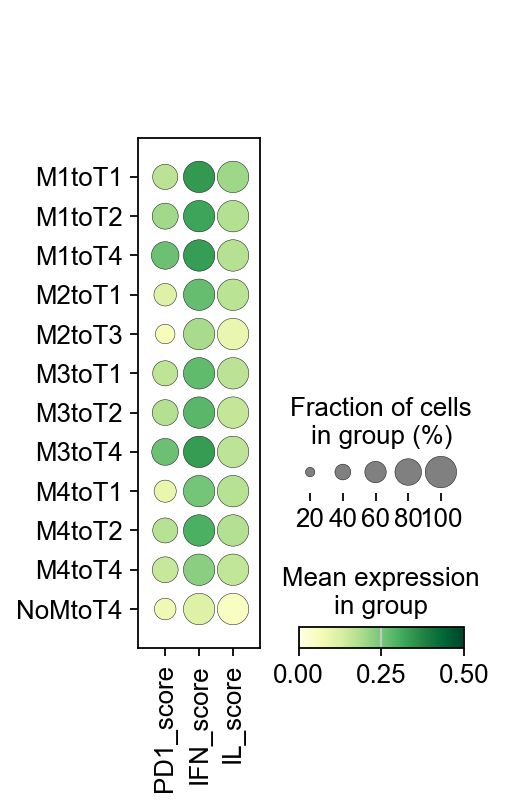

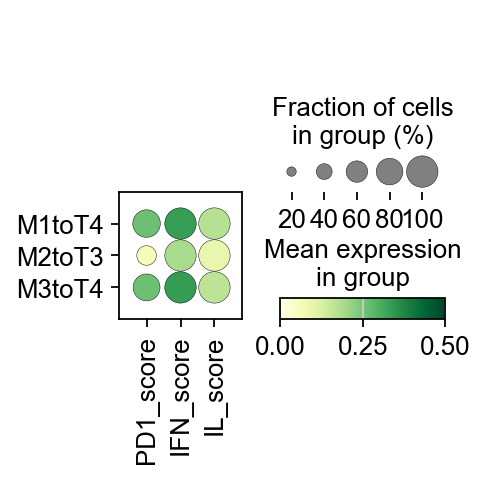

In [34]:
sc.pl.dotplot(adata_T, ['PD1_score','IFN_score','IL_score'],vmin=0.00,vmax=0.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M2toT3','M3toT4'])], ['PD1_score','IFN_score','IL_score'],vmin=0.00,vmax=0.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44')

In [40]:
# GOBP
# HSF1 : M1T4 specific
# FGF and IFN-gamma : M3T4 and Responders shared
sc.tl.score_genes(adata_T,HSF1_genes, score_name='HSF1_score')
sc.tl.score_genes(adata_T,FGF_response, score_name='FGF_score')
sc.tl.score_genes(adata_T,IFN_G_genes, score_name='IFN-gamma_score')


computing score 'HSF1_score'
    finished: added
    'HSF1_score', score of gene set (adata.obs).
    196 total control genes are used. (0:00:04)
computing score 'FGF_score'
    finished: added
    'FGF_score', score of gene set (adata.obs).
    349 total control genes are used. (0:00:04)
computing score 'IFN-gamma_score'
    finished: added
    'IFN-gamma_score', score of gene set (adata.obs).
    448 total control genes are used. (0:00:04)


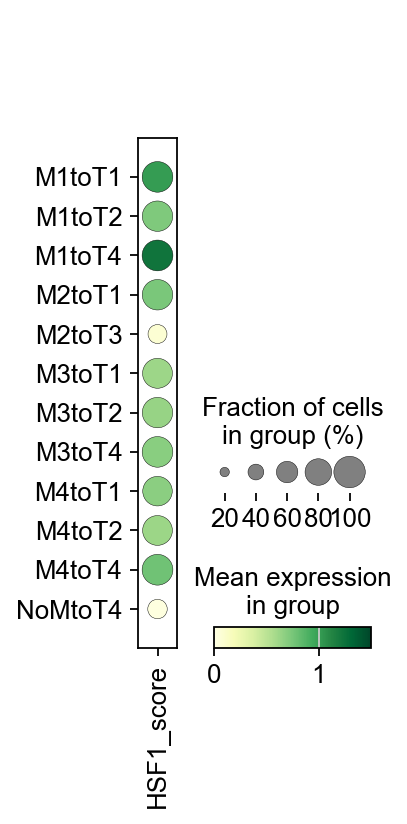

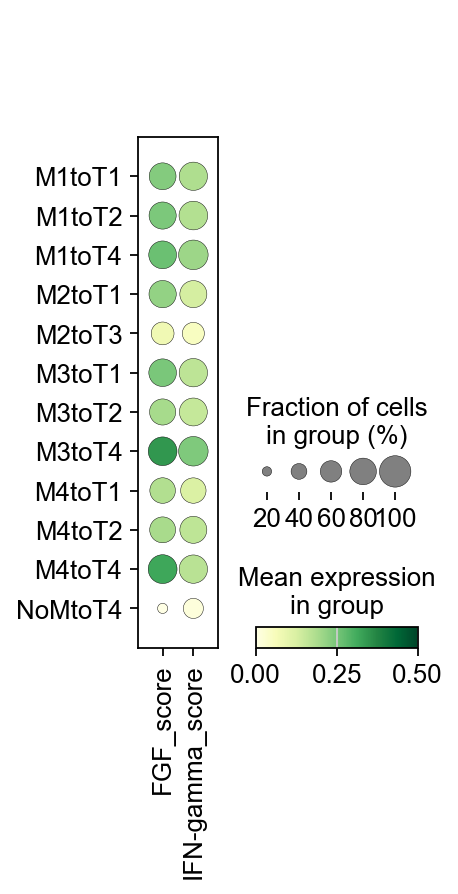

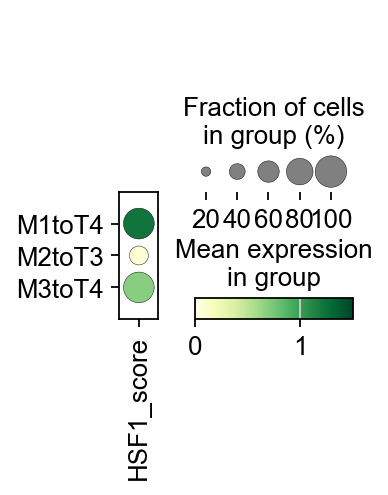

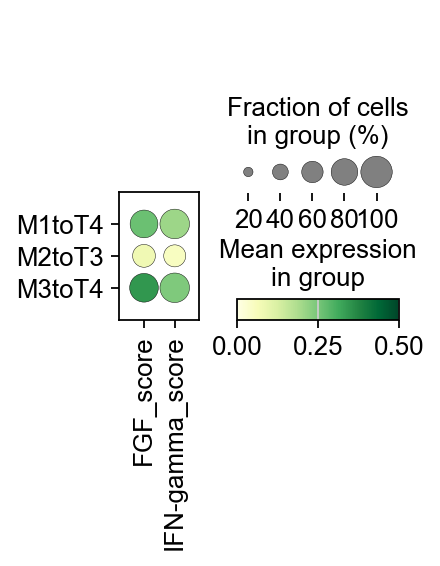

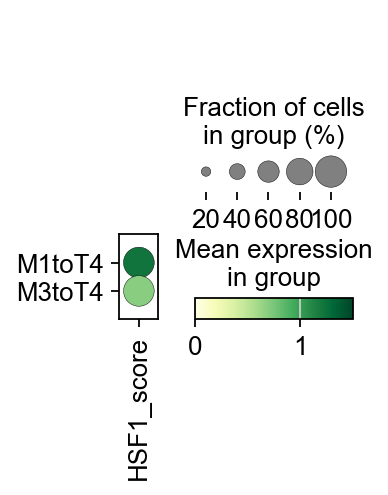

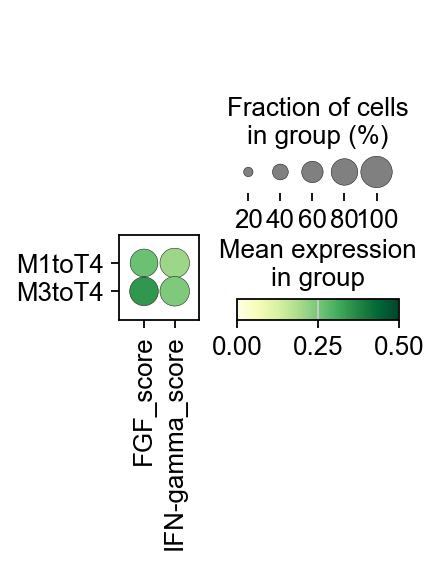

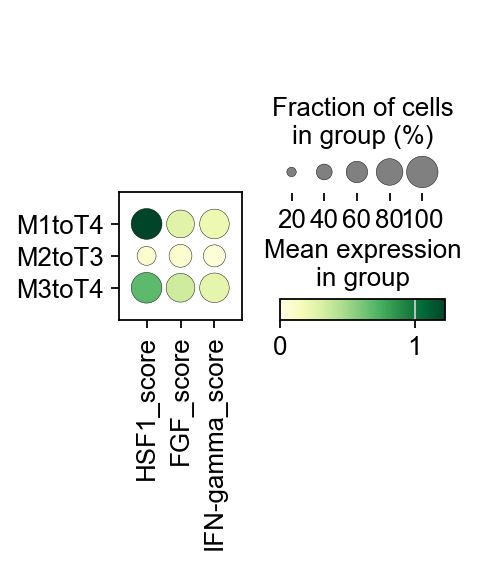

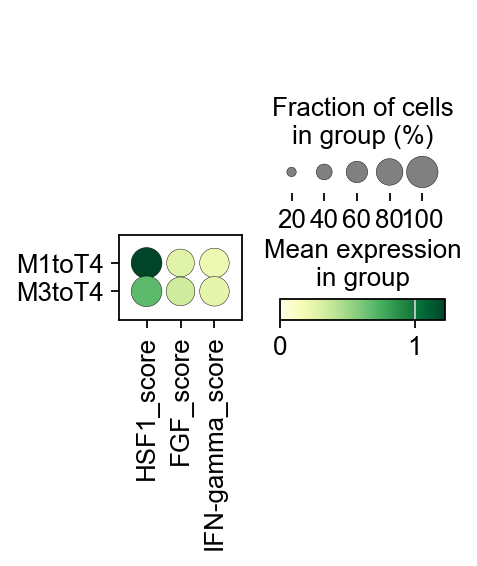

In [68]:
sc.pl.dotplot(adata_T, ['HSF1_score'],vmin=0.00,vmax=1.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44',
              save='_HSF1_score_in_MT_class_Tcells.pdf')
sc.pl.dotplot(adata_T, ['FGF_score','IFN-gamma_score'],vmin=0.00,vmax=0.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44',
              save='_FGF_IFN-gamma_score_in_MT_class_Tcells.pdf')

sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M2toT3','M3toT4'])], ['HSF1_score'],vmin=0.00,vmax=1.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44',
              )
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M2toT3','M3toT4'])], ['FGF_score','IFN-gamma_score'],vmin=0.00,vmax=0.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44',
             )

sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['HSF1_score'],vmin=0.00,vmax=1.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44',
              save='_HSF1_score_in_m1t1_m3t3_Tcells.pdf')
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['FGF_score','IFN-gamma_score'],vmin=0.00,vmax=0.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44',
              save='_FGF_IFN-gamma_score_in_MT_class_in_m1t1_m3t3_Tcells.pdf')

sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M2toT3','M3toT4'])], ['HSF1_score','FGF_score','IFN-gamma_score'],vmin=0.00,#vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['HSF1_score','FGF_score','IFN-gamma_score'],vmin=0.00,#vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')

In [63]:
# GOBP
# GOBP_VIRAL_GENOME_REPLICATION, GOBP_REGULATION_OF_CELL_MORPHOGENESIS, and GOBP_REGULATION_OF_ION_TRANSPORT : M3T4 and Responders shared
sc.tl.score_genes(adata_T,GOBP_VIRAL_GENOME_REPLICATION, score_name='viral_rep_score')
sc.tl.score_genes(adata_T,GOBP_REGULATION_OF_CELL_MORPHOGENESIS, score_name='cell_morph_score')
sc.tl.score_genes(adata_T,GOBP_REGULATION_OF_ION_TRANSPORT, score_name='ion_trans_score')

computing score 'viral_rep_score'
    finished: added
    'viral_rep_score', score of gene set (adata.obs).
    596 total control genes are used. (0:00:04)
computing score 'cell_morph_score'
    finished: added
    'cell_morph_score', score of gene set (adata.obs).
    498 total control genes are used. (0:00:04)
computing score 'ion_trans_score'
    finished: added
    'ion_trans_score', score of gene set (adata.obs).
    646 total control genes are used. (0:00:04)


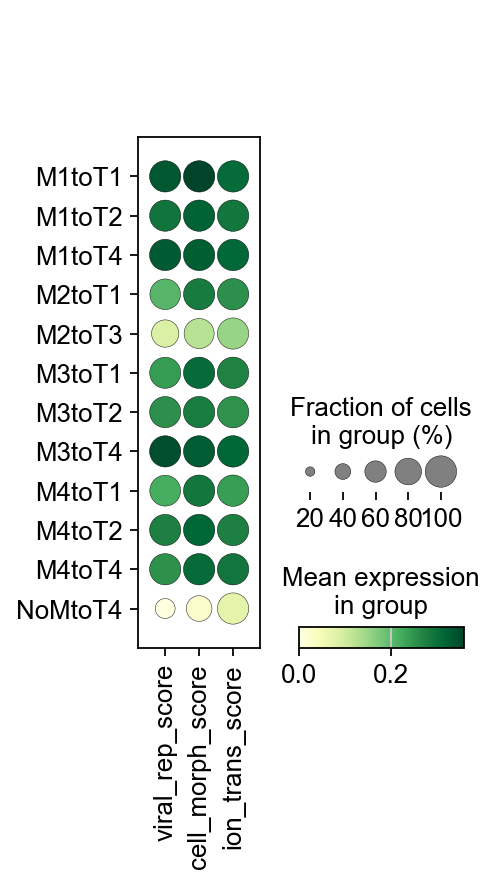

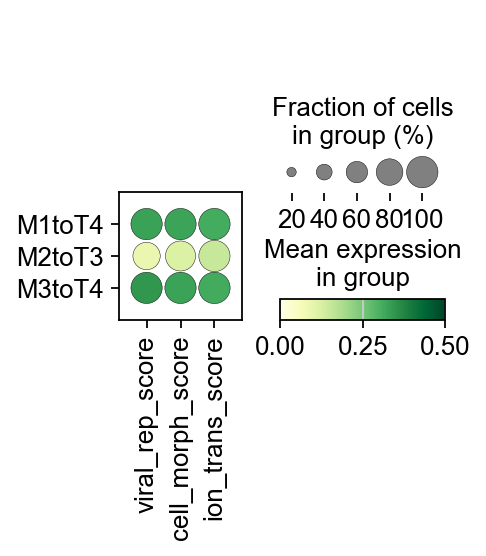

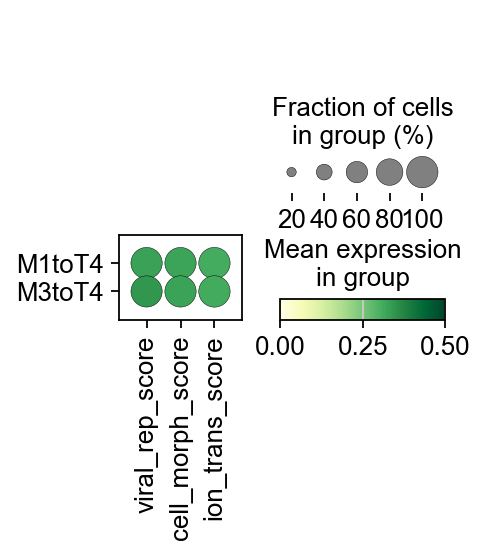

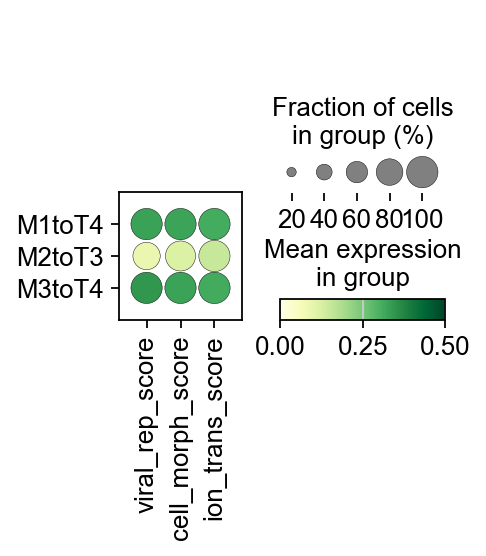

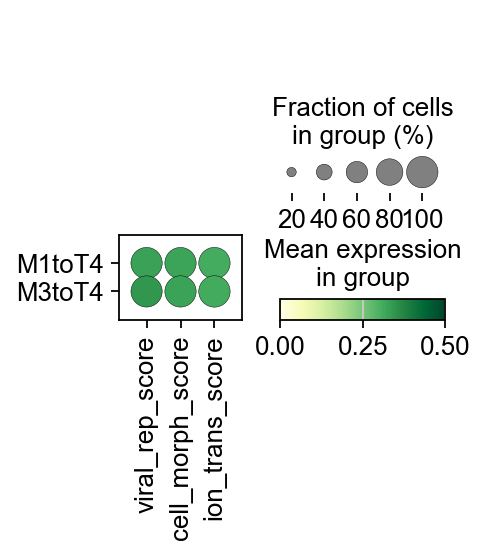

In [67]:
#sc.pl.dotplot(adata_T, ['HSF1_score'],vmin=0.00,vmax=1.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, ['viral_rep_score','cell_morph_score','ion_trans_score'],vmin=0.00,#vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')

#sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M2toT3','M3toT4'])], ['HSF1_score'],vmin=0.00,vmax=1.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M2toT3','M3toT4'])], ['viral_rep_score','cell_morph_score','ion_trans_score'],vmin=0.00,vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')

#sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['HSF1_score'],vmin=0.00,vmax=1.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['viral_rep_score','cell_morph_score','ion_trans_score'],vmin=0.00,vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')

sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M2toT3','M3toT4'])], ['viral_rep_score','cell_morph_score','ion_trans_score'],vmin=0.00,vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['viral_rep_score','cell_morph_score','ion_trans_score'],vmin=0.00,vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')

In [74]:
# REACTOME_GLUCONEOGENESIS, REACTOME_SEMAPHORIN_INTERACTIONS, REACTOME_PLATELET_ACTIVATION_SIGNALING_AND_AGGREGATION,
# REACTOME_CLASS_I_MHC_MEDIATED_ANTIGEN_PROCESSING_PRESENTATION, REACTOME_HEMOSTASIS
sc.tl.score_genes(adata_T,REACTOME_GLUCONEOGENESIS, score_name='gluconeo_score')
sc.tl.score_genes(adata_T,REACTOME_SEMAPHORIN_INTERACTIONS, score_name='semaphorin_score')
sc.tl.score_genes(adata_T,REACTOME_PLATELET_ACTIVATION_SIGNALING_AND_AGGREGATION, score_name='platelet_score')
sc.tl.score_genes(adata_T,REACTOME_CLASS_I_MHC_MEDIATED_ANTIGEN_PROCESSING_PRESENTATION, score_name='mhci_score')
sc.tl.score_genes(adata_T,REACTOME_HEMOSTASIS, score_name='hemostasis_score')

computing score 'gluconeo_score'
    finished: added
    'gluconeo_score', score of gene set (adata.obs).
    248 total control genes are used. (0:00:04)
computing score 'semaphorin_score'
    finished: added
    'semaphorin_score', score of gene set (adata.obs).
    398 total control genes are used. (0:00:04)
computing score 'platelet_score'
    finished: added
    'platelet_score', score of gene set (adata.obs).
    544 total control genes are used. (0:00:04)
computing score 'mhci_score'
    finished: added
    'mhci_score', score of gene set (adata.obs).
    741 total control genes are used. (0:00:04)
computing score 'hemostasis_score'
    finished: added
    'hemostasis_score', score of gene set (adata.obs).
    694 total control genes are used. (0:00:04)


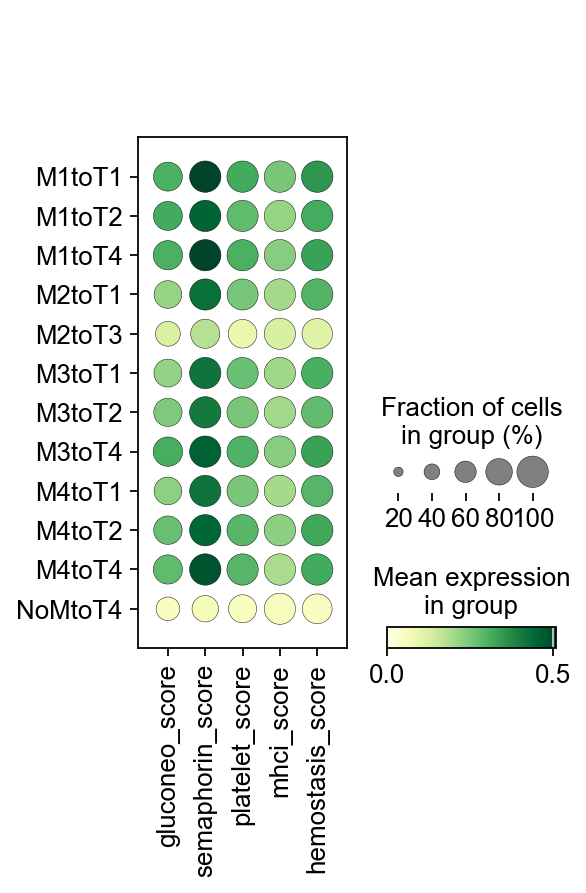

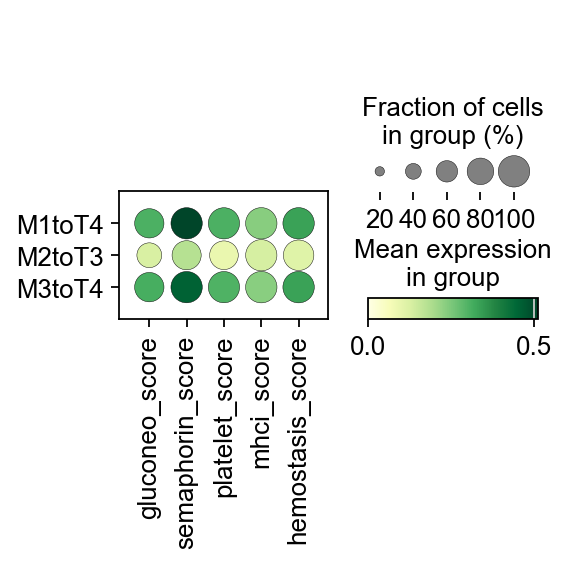

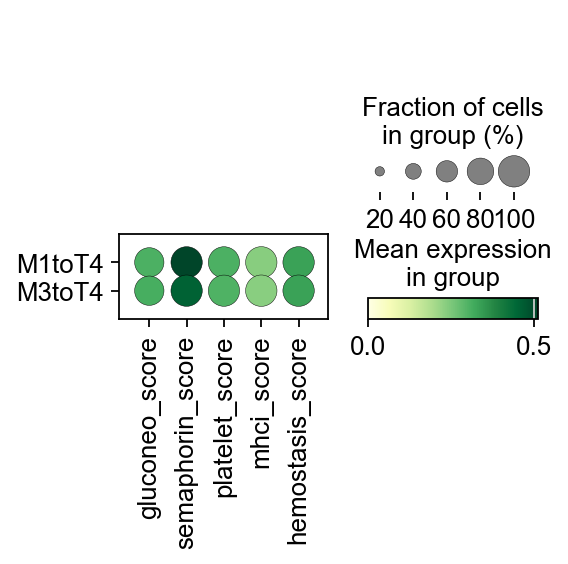

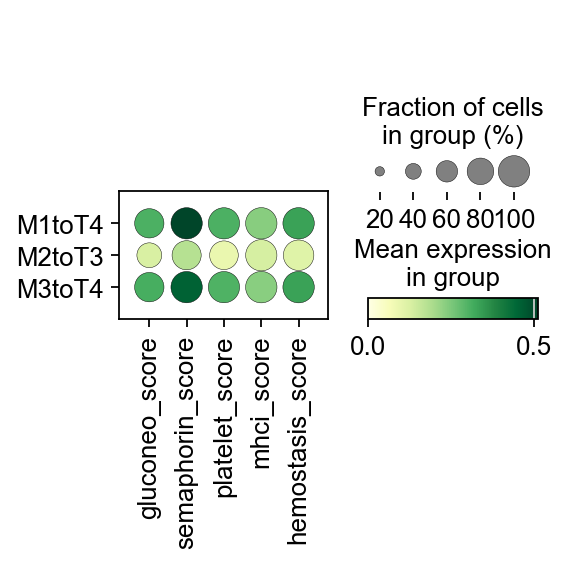

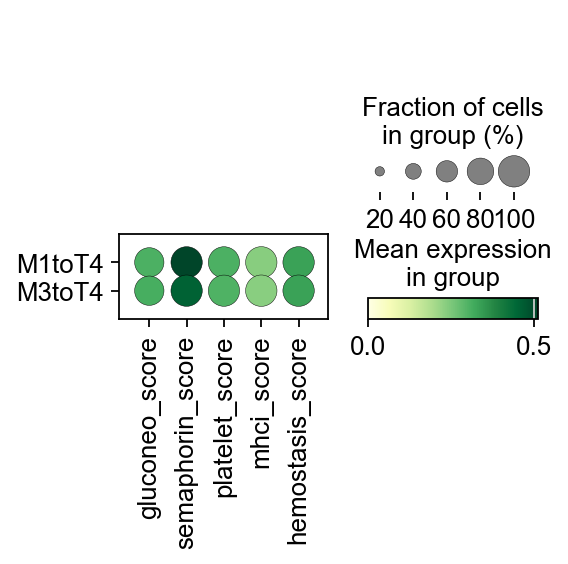

In [76]:
#sc.pl.dotplot(adata_T, ['HSF1_score'],vmin=0.00,vmax=1.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, ['gluconeo_score','semaphorin_score','platelet_score','mhci_score','hemostasis_score'],vmin=0.00,#vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')

#sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M2toT3','M3toT4'])], ['HSF1_score'],vmin=0.00,vmax=1.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M2toT3','M3toT4'])], ['gluconeo_score','semaphorin_score','platelet_score','mhci_score','hemostasis_score'],vmin=0.00,#vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')

#sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['HSF1_score'],vmin=0.00,vmax=1.5,cmap='YlGn', groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['gluconeo_score','semaphorin_score','platelet_score','mhci_score','hemostasis_score'],vmin=0.00,#vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')

sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M2toT3','M3toT4'])], ['gluconeo_score','semaphorin_score','platelet_score','mhci_score','hemostasis_score'],vmin=0.00,#vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['gluconeo_score','semaphorin_score','platelet_score','mhci_score','hemostasis_score'],vmin=0.00,#vmax=0.5,
              cmap='YlGn', groupby='Myeloid_to_T_cluster44')

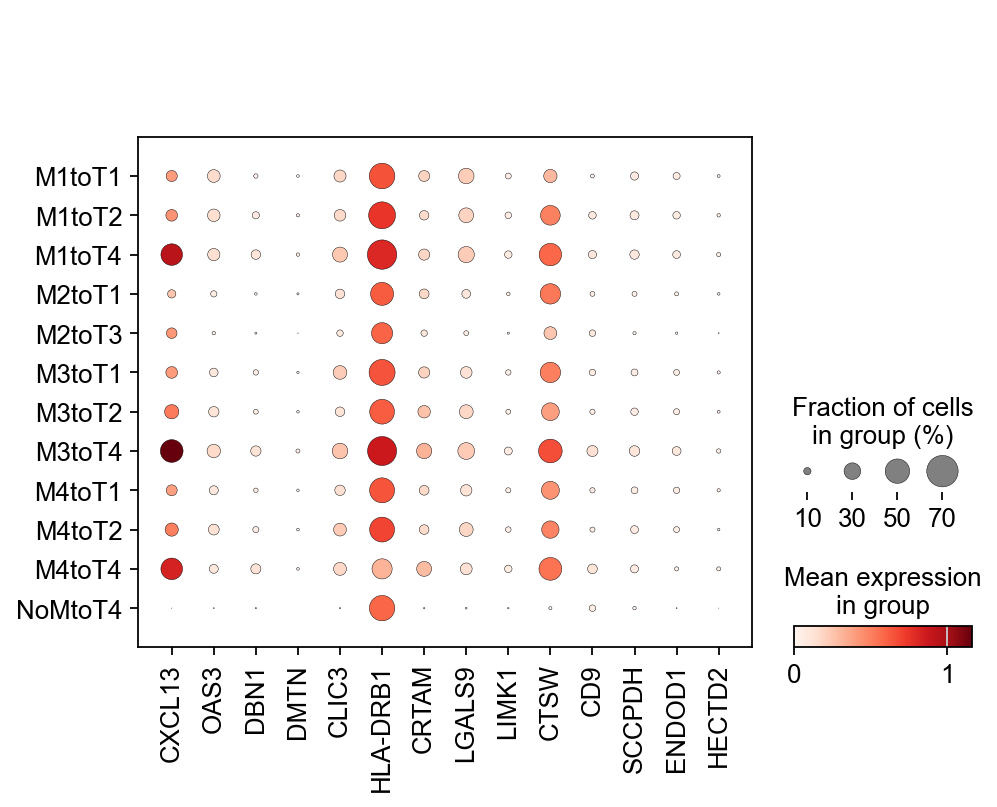

In [77]:
sc.pl.dotplot(adata_T, ['CXCL13','OAS3','DBN1','DMTN','CLIC3','HLA-DRB1',
                         'CRTAM','LGALS9','LIMK1',
                         'CTSW','CD9','SCCPDH','ENDOD1','HECTD2'], groupby='Myeloid_to_T_cluster44')

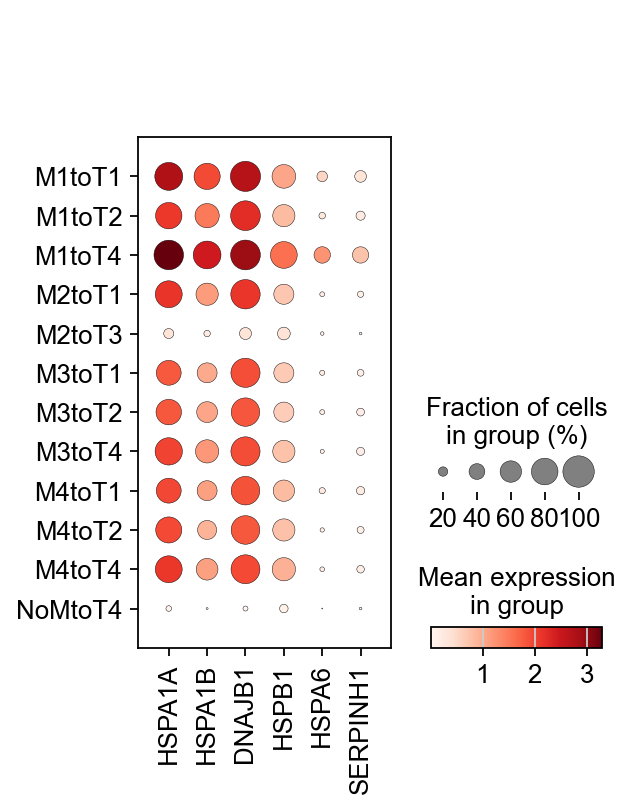

In [79]:
sc.pl.dotplot(adata_T, ["HSPA1A", "HSPA1B", "DNAJB1", "HSPB1",
                         "HSPA6", "SERPINH1"], 'Myeloid_to_T_cluster44')

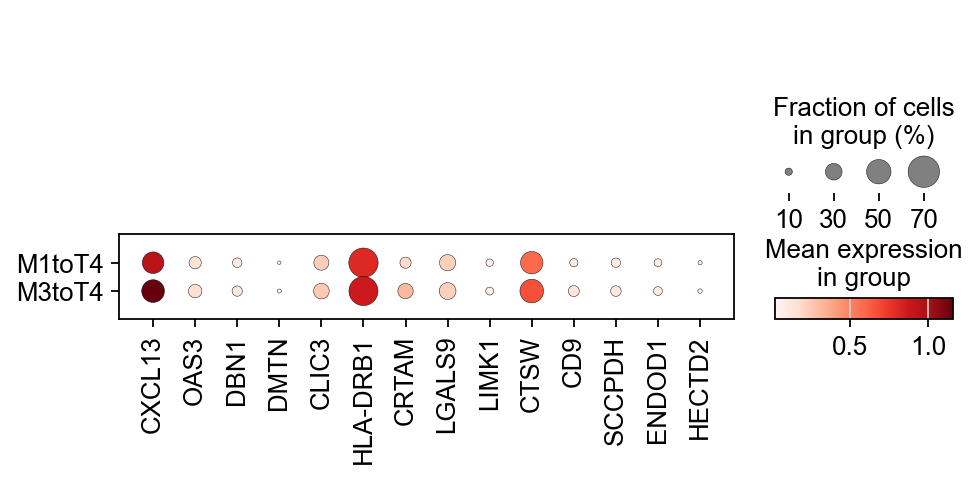

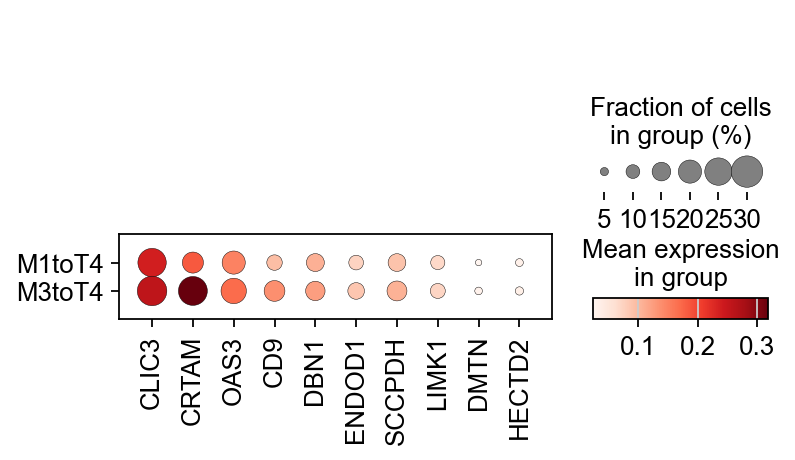

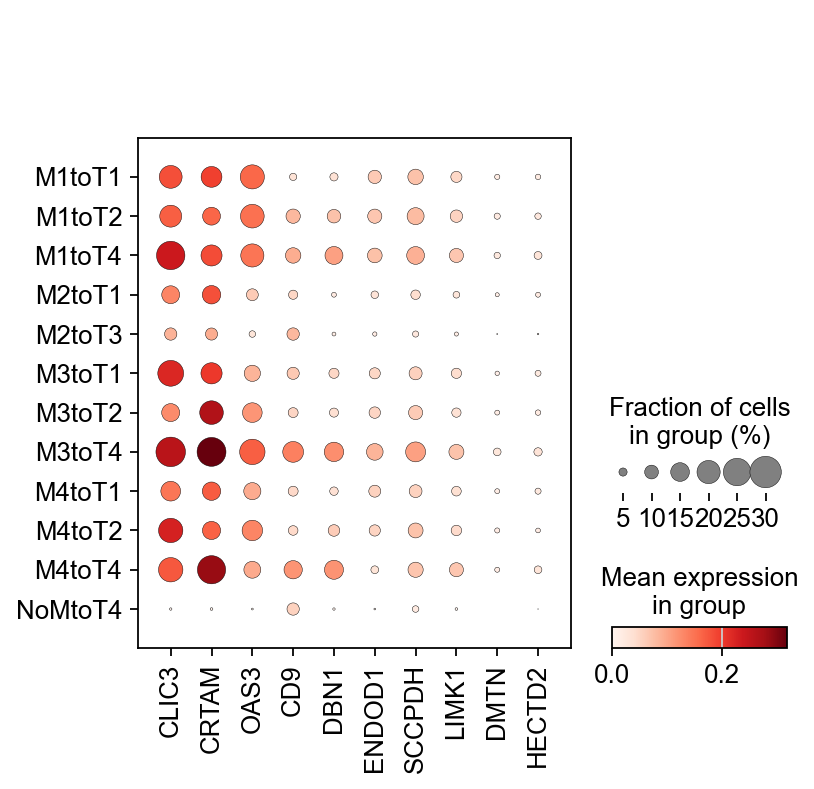

In [84]:
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['CXCL13','OAS3','DBN1','DMTN','CLIC3','HLA-DRB1',
                         'CRTAM','LGALS9','LIMK1',
                         'CTSW','CD9','SCCPDH','ENDOD1','HECTD2'], groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], [
    'CLIC3','CRTAM','OAS3','CD9','DBN1','ENDOD1','SCCPDH', 'LIMK1','DMTN','HECTD2'
                        #'CXCL13',#'HLA-DRB1',
                         #'CTSW','LGALS9',
    ], groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, [
    'CLIC3','CRTAM','OAS3','CD9','DBN1','ENDOD1','SCCPDH', 'LIMK1','DMTN','HECTD2'
                        #'CXCL13',#'HLA-DRB1',
                         #'CTSW','LGALS9',
    ], groupby='Myeloid_to_T_cluster44')

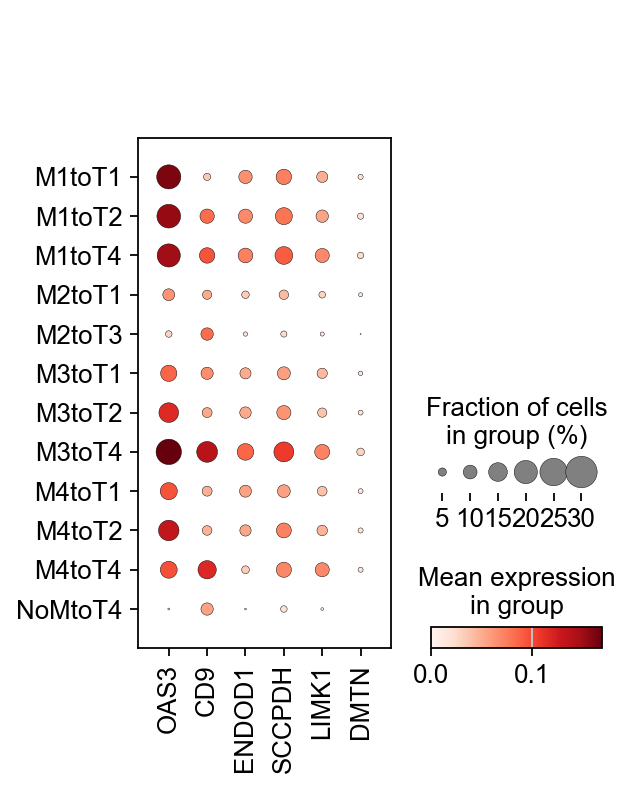

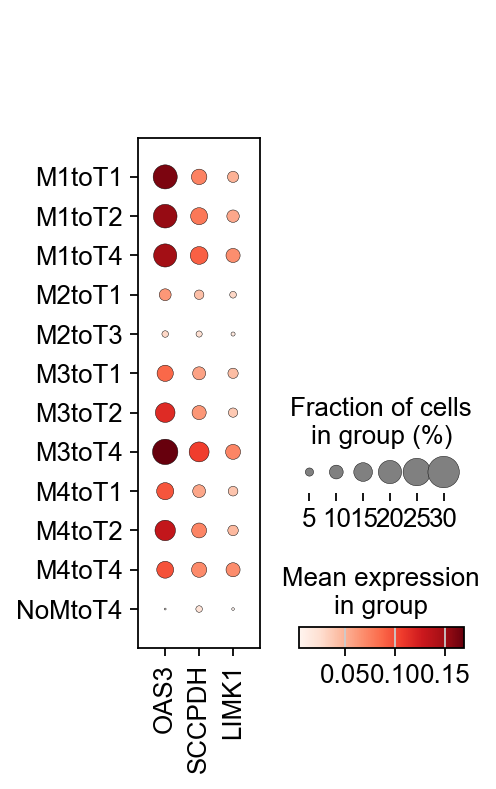

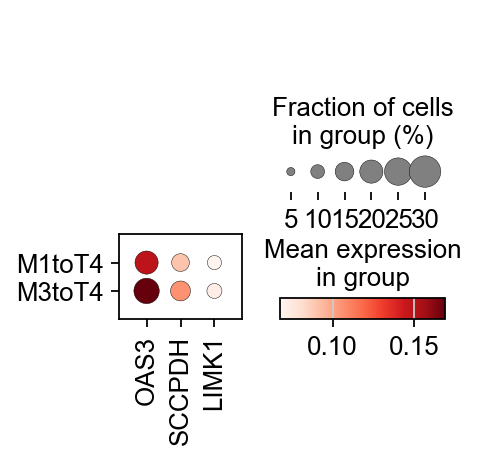

In [88]:
sc.pl.dotplot(adata_T, [
    #'CLIC3','CRTAM',
    'OAS3','CD9',#'DBN1',
    'ENDOD1','SCCPDH', 'LIMK1','DMTN',#'HECTD2'
                        #'CXCL13',#'HLA-DRB1',
                         #'CTSW','LGALS9',
    ], groupby='Myeloid_to_T_cluster44')
sc.pl.dotplot(adata_T, ['OAS3', 'SCCPDH', 'LIMK1',
    #'CLIC3','CRTAM',#'CD9',#'DBN1', #'ENDOD1', #'DMTN',#'HECTD2',#'CXCL13',#'HLA-DRB1', #'CTSW','LGALS9',
    ], groupby='Myeloid_to_T_cluster44', save= '_OAS3,SCCPDH,LIMK1_in_MT_class_Tcell.pdf')
sc.pl.dotplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['OAS3', 'SCCPDH', 'LIMK1',
    #'CLIC3','CRTAM',#'CD9',#'DBN1', #'ENDOD1', #'DMTN',#'HECTD2',#'CXCL13',#'HLA-DRB1', #'CTSW','LGALS9',
    ], groupby='Myeloid_to_T_cluster44', save= '_OAS3,SCCPDH,LIMK1_in_m1t4,m3t4_Tcell.pdf')

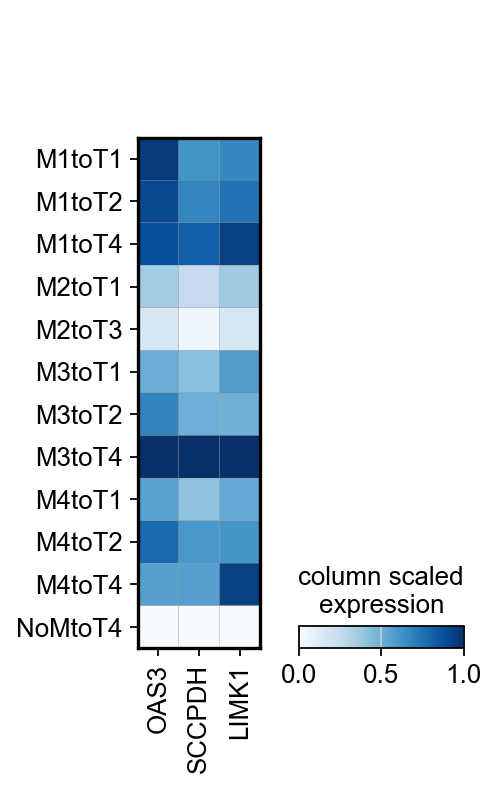

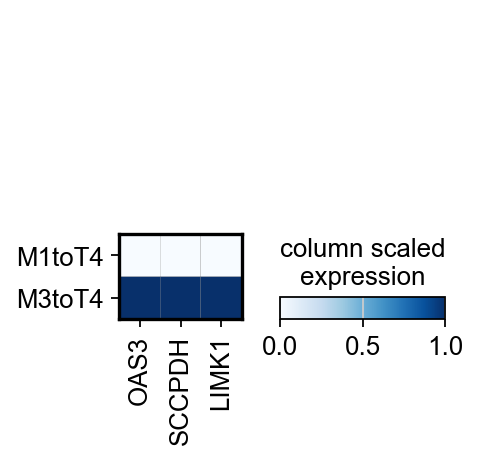

In [10]:
sc.pl.matrixplot(adata_T, ['OAS3', 'SCCPDH', 'LIMK1',
    #'CLIC3','CRTAM',#'CD9',#'DBN1', #'ENDOD1', #'DMTN',#'HECTD2',#'CXCL13',#'HLA-DRB1', #'CTSW','LGALS9',
    ], 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')
sc.pl.matrixplot(adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])], ['OAS3', 'SCCPDH', 'LIMK1',
    #'CLIC3','CRTAM',#'CD9',#'DBN1', #'ENDOD1', #'DMTN',#'HECTD2',#'CXCL13',#'HLA-DRB1', #'CTSW','LGALS9',
    ], 'Myeloid_to_T_cluster44',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

In [13]:
adata_T_sub = adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])]
adata_T_sub.obs['class_1'] = adata_T_sub.obs['Myeloid_to_T_cluster44']
adata_T_sub.obs['class_1'].cat.reorder_categories(['M3toT4', 'M1toT4'], inplace = True)

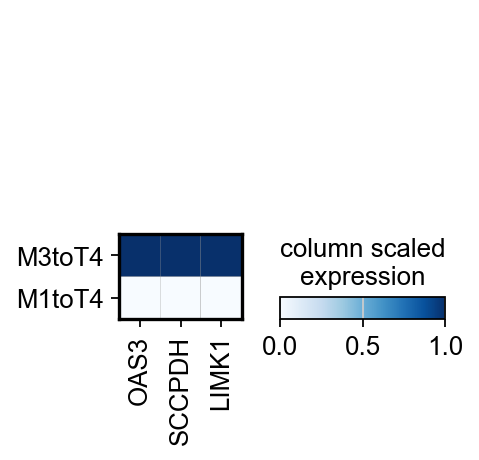

In [17]:
sc.pl.matrixplot(adata_T_sub, ['OAS3', 'SCCPDH', 'LIMK1',
    #'CLIC3','CRTAM',#'CD9',#'DBN1', #'ENDOD1', #'DMTN',#'HECTD2',#'CXCL13',#'HLA-DRB1', #'CTSW','LGALS9',
    ], 'class_1',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression', save='_OAS3,SCCPDH,LIMK1_in_Tcell_m1t4,m3t4.pdf')

In [18]:
sc.tl.rank_genes_groups(adata_T_sub, 'class_1', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


In [19]:
result = adata_T_sub.uns['rank_genes_groups']
groups = result['names'].dtype.names
pval_table = pd.DataFrame(
            {group + '_' + key[:2]: result[key][group]
            for group in groups for key in ['names', 'pvals_adj']})
pval_table

M3toT4_na  M3toT4_pv M1toT4_na  M1toT4_pv
0          BTG1        0.0     HSPA6        0.0
1       ZFP36L2        0.0    HSPA1B        0.0
2         CXCR4        0.0    HSPA1A        0.0
3       TSC22D3        0.0     HSPB1        0.0
4         HLA-B        0.0      BAG3        0.0
...         ...        ...       ...        ...
12494      BAG3        0.0     HLA-B        0.0
12495     HSPB1        0.0   TSC22D3        0.0
12496    HSPA1A        0.0     CXCR4        0.0
12497    HSPA1B        0.0   ZFP36L2        0.0
12498     HSPA6        0.0      BTG1        0.0

[12499 rows x 4 columns]

In [20]:
pval_table.loc[pval_table['M3toT4_na'].isin(['MS4A6A','SNRPD3','OAS3','SCCPDH','LIMK1'])]

M3toT4_na     M3toT4_pv M1toT4_na     M1toT4_pv
448      SCCPDH  3.273393e-07    BCL2L1  6.364351e-38
477        OAS3  1.132723e-06  CCNB1IP1  2.688024e-36
1544      LIMK1  1.373677e-01       VCL  1.253910e-13
5603     SNRPD3  1.076910e-01      TAF2  1.544171e-02
11739    MS4A6A  1.019104e-25      USO1  8.962971e-04

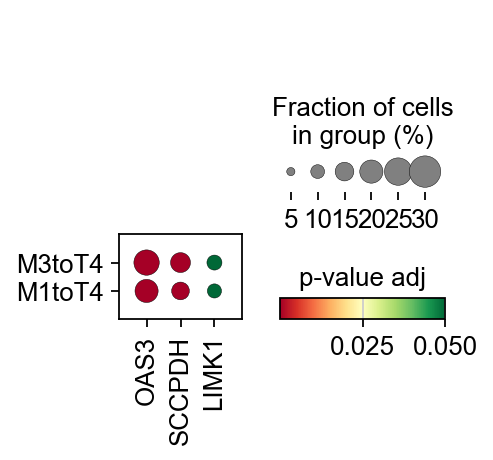

In [28]:
markers = ['OAS3','SCCPDH','LIMK1']
sc.pl.rank_genes_groups_dotplot(adata_T_sub, var_names= markers, values_to_plot='pvals_adj', key='rank_genes_groups',vmax=0.05, dendrogram=False,color_map='RdYlGn', save='_OAS3_SCCPDH_LIMK1_pval_in_Tcell_m1t4,m3t4.pdf')

In [21]:
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white', format='tif')

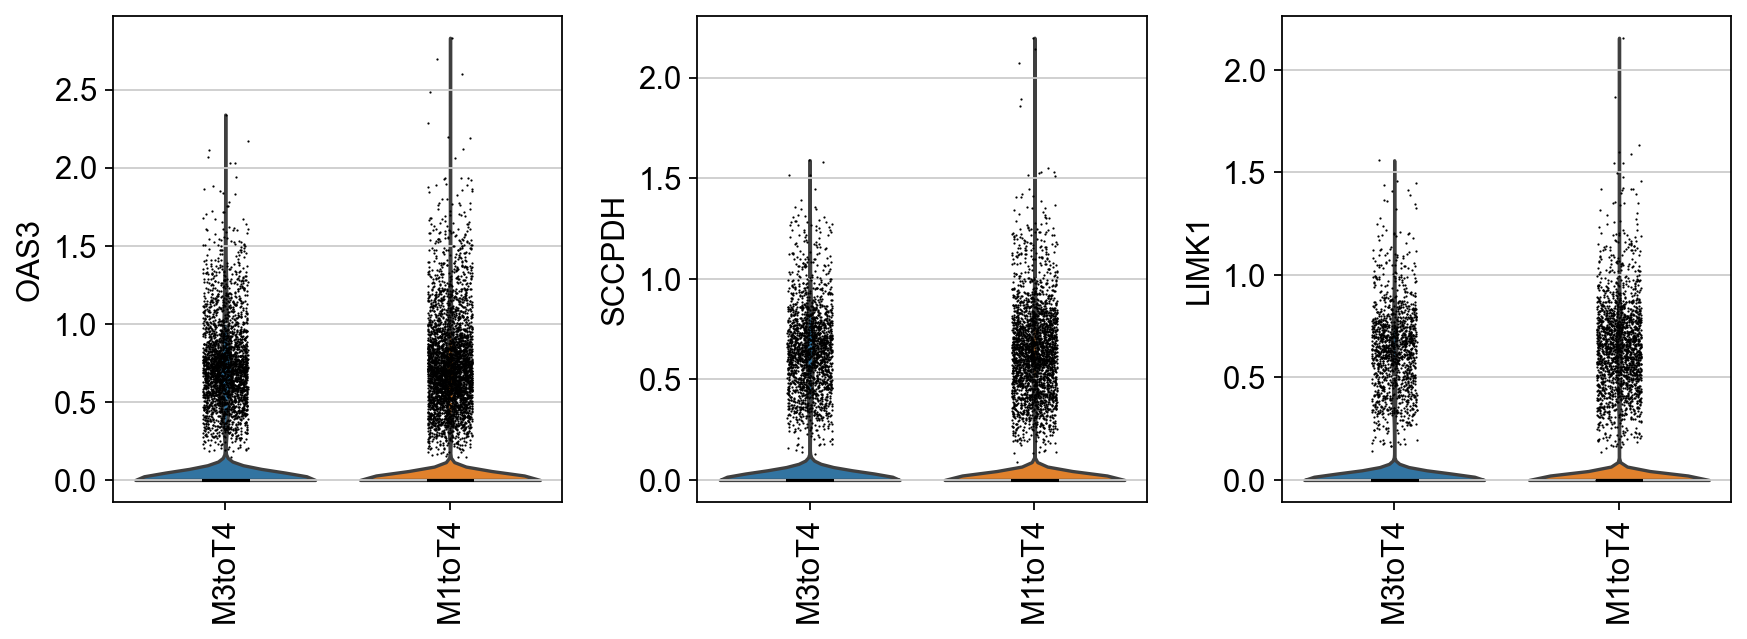

In [23]:
sc.pl.violin(adata_T_sub, keys=['OAS3','SCCPDH','LIMK1'], groupby='class_1',
    rotation=90, save='_OAS3_SCCPDH_LIMK1_in_Tcell_m1t4,m3t4.tif')

In [9]:
adata_T.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGTAGCCGA-1-0-0    3934.0               3879   1452.073242   
AAACCTGCAAGAGGCT-1-0-0     674.0                669    882.995728   
AAACCTGCAGTATCTG-1-0-0    1014.0               1003    956.411804   
AAACCTGGTGCCTGGT-1-0-0     896.0                885   1091.559448   
AAACCTGGTGCGCTTG-1-0-0     786.0                772    876.556519   
...                          ...                ...           ...   
TTTGGTTAGCAAATCA-1-24-2   1375.0               1351   1476.700806   
TTTGGTTAGTGGTAAT-1-24-2   1606.0               1573   1480.355835   
TTTGGTTCAAGCCATT-1-24-2   4456.0               4328   1867.209229   
TTTGTCAGTCCTCTTG-1-24-2   2711.0               2644   1972.602417   
TTTGTCAGTCTCTTTA-1-24-2   1890.0               1858   1673.672119   

                         total_counts_mt  pct_counts_mt tissue patient leiden  \
AAACCTGAGTAGCCGA-1-0-0         18.802568       1.294877  tumor    P686      6   
AAACCTGCAAGAGGCT-1-0-0         11.229170       1.271713  tumor    P686      6   
AAACCTGCAGTATCTG-1-0-0         18.788149       1.964441  tumor    P686      6   
AAACCTGGTGCCTGGT-1-0-0         17.238060       1.579214  tumor    P686      6   
AAACCTGGTGCGCTTG-1-0-0         18.123993       2.067635  tumor    P686      6   
...                                  ...            ...    ...     ...    ...   
TTTGGTTAGCAAATCA-1-24-2        22.369625       1.514838  tumor    P001      1   
TTTGGTTAGTGGTAAT-1-24-2        29.242380       1.975362  tumor    P001      4   
TTTGGTTCAAGCCATT-1-24-2        29.546848       1.582407  tumor    P001      0   
TTTGTCAGTCCTCTTG-1-24-2        24.433256       1.238631  tumor    P001     10   
TTTGTCAGTCTCTTTA-1-24-2         7.590561       0.453527  tumor    P001      4   

                        batch  total_counts_ribo  ...     n_counts  celltype  \
AAACCTGAGTAGCCGA-1-0-0      0         198.197769  ...  1452.073242         6   
AAACCTGCAAGAGGCT-1-0-0      0         213.666718  ...   882.995728         6   
AAACCTGCAGTATCTG-1-0-0      0         221.148575  ...   956.411804         6   
AAACCTGGTGCCTGGT-1-0-0      0         176.360626  ...  1091.559448         6   
AAACCTGGTGCGCTTG-1-0-0      0         217.813019  ...   876.556519         6   
...                       ...                ...  ...          ...       ...   
TTTGGTTAGCAAATCA-1-24-2     2         184.743835  ...  1476.700806         1   
TTTGGTTAGTGGTAAT-1-24-2     2         188.684555  ...  1480.355835         4   
TTTGGTTCAAGCCATT-1-24-2     2         172.502136  ...  1867.209229         0   
TTTGTCAGTCCTCTTG-1-24-2     2         120.637726  ...  1972.602417        10   
TTTGTCAGTCTCTTTA-1-24-2     2         163.753265  ...  1673.672119         4   

                          crude   celltype_detail  patient_cluster  \
AAACCTGAGTAGCCGA-1-0-0   T cell        CD8 T cell          Group A   
AAACCTGCAAGAGGCT-1-0-0   T cell        CD8 T cell          Group A   
AAACCTGCAGTATCTG-1-0-0   T cell        CD8 T cell          Group A   
AAACCTGGTGCCTGGT-1-0-0   T cell        CD8 T cell          Group A   
AAACCTGGTGCGCTTG-1-0-0   T cell        CD8 T cell          Group A   
...                         ...               ...              ...   
TTTGGTTAGCAAATCA-1-24-2  T cell   effector T cell          Group A   
TTTGGTTAGTGGTAAT-1-24-2  T cell        CD4 T cell          Group A   
TTTGGTTCAAGCCATT-1-24-2  T cell        CD4 T cell          Group A   
TTTGTCAGTCCTCTTG-1-24-2  T cell  exhausted T cell          Group A   
TTTGTCAGTCTCTTTA-1-24-2  T cell        CD4 T cell          Group A   

                               dataset T_patient_cluster T_patient_cluster4  \
AAACCTGAGTAGCCGA-1-0-0    Dinh dataset               NaN                T_3   
AAACCTGCAAGAGGCT-1-0-0    Dinh dataset               NaN                T_3   
AAACCTGCAGTATCTG-1-0-0    Dinh dataset               NaN                T_3   
AAACCTGGTGCCTGGT-1-0-0    Dinh dataset               NaN                T_3   
AAACCTGGTGCGCTTG-1-0-0    

In [23]:
adata_T_1 = adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])]
adata_T_1

View of AnnData object with n_obs × n_vars = 29904 × 12499
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44', 'HSF1_score'
    var: 'gene_ids', 'mt', 'feature_types-10', 'feature_types-11', 'feature_types-12', 'feature_types-13', 'feature_types-14', 'feature_types-15', 'feature_types-16', 'feature_types-17', 'feature_types-18', 'feature_types-19', 'feature_types-20', 'feature_types-21', 'feature_types-3', 'feature_types-4', 'feature_types-5', 'feature_types-6', 'feature_types-7', 'feature_types-8', 'feature_types-9', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0'

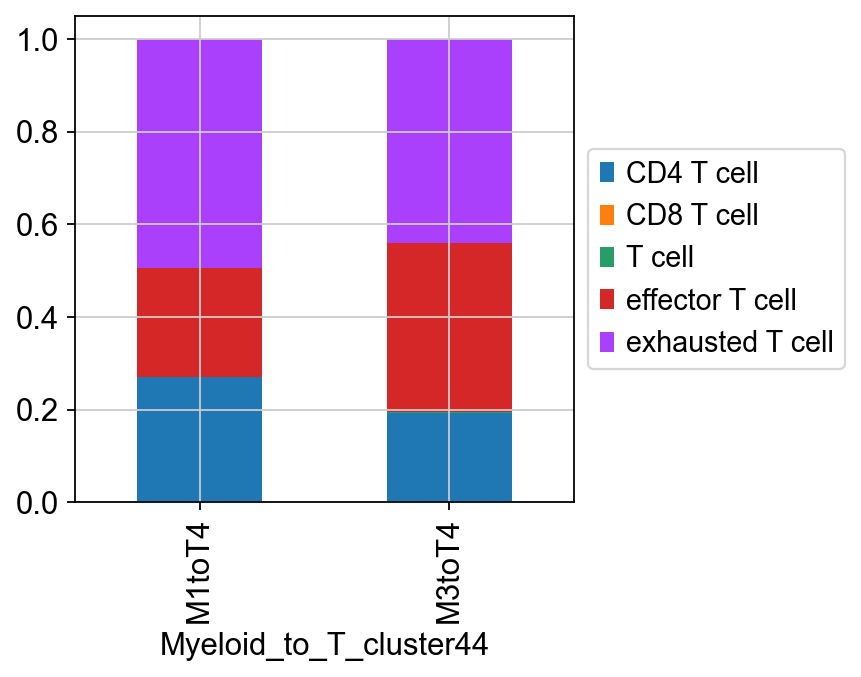

In [11]:
tmp = pd.crosstab(adata_T_1.obs['Myeloid_to_T_cluster44'],adata_T_1.obs['celltype_detail'], normalize='index')
ax = tmp.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).get_figure()

#ax.savefig('t_cell_stacked_bar.pdf')

In [19]:
sc.tl.score_genes(adata_T,HSF1_genes, score_name='HSF1_score')

computing score 'HSF1_score'
    finished: added
    'HSF1_score', score of gene set (adata.obs).
    196 total control genes are used. (0:00:04)


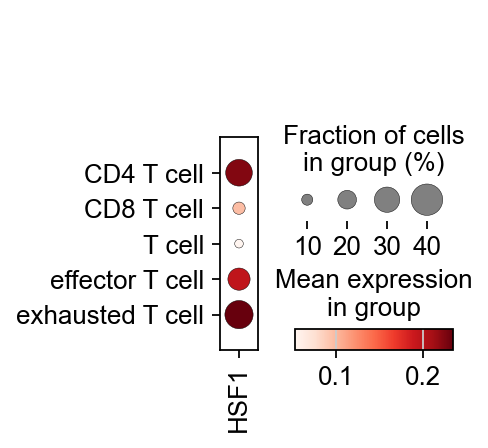

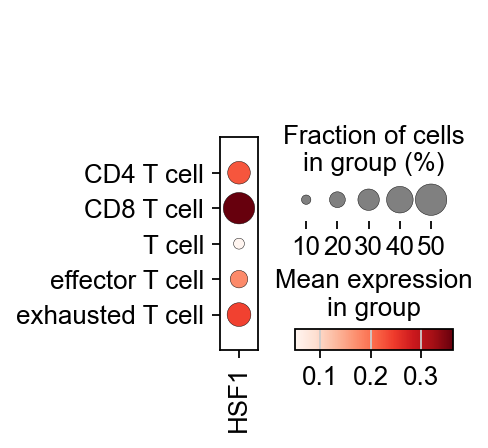

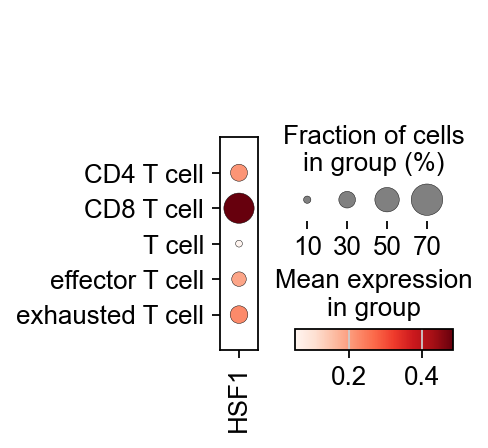

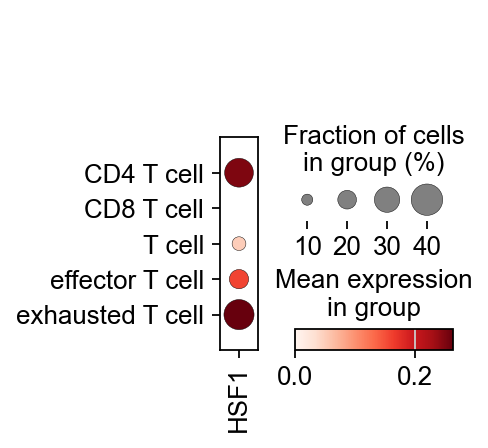

In [17]:
sc.pl.dotplot(adata_T, ['HSF1'], groupby='celltype_detail')
sc.pl.dotplot(adata_T_1, ['HSF1'], groupby='celltype_detail')
sc.pl.dotplot(adata_T_1[adata_T_1.obs['Myeloid_to_T_cluster44']=='M1toT4'], ['HSF1'], groupby='celltype_detail')
sc.pl.dotplot(adata_T_1[adata_T_1.obs['Myeloid_to_T_cluster44']=='M3toT4'], ['HSF1'], groupby='celltype_detail')

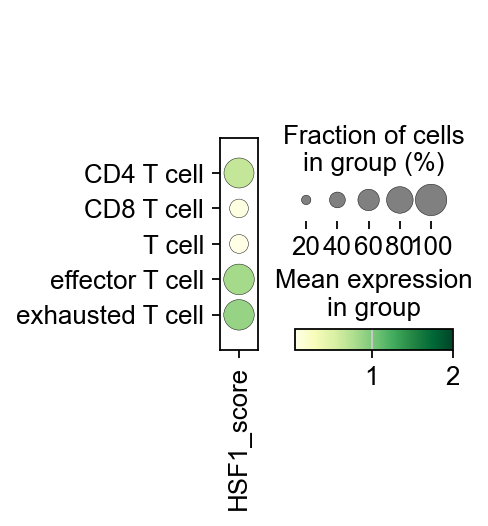

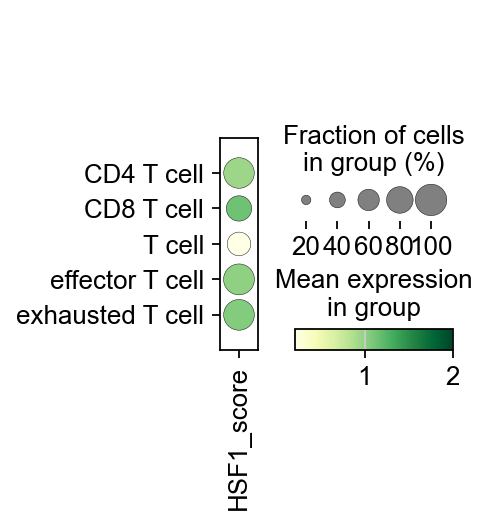

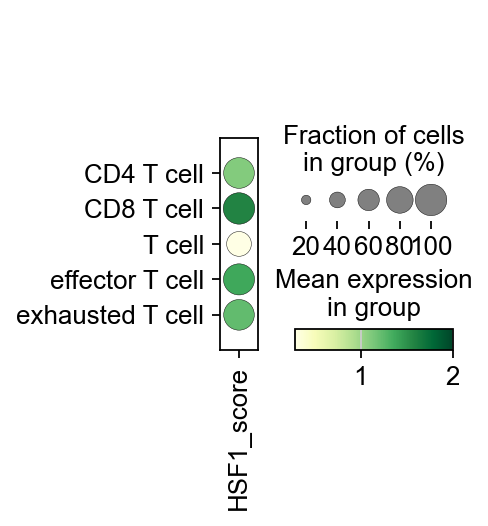

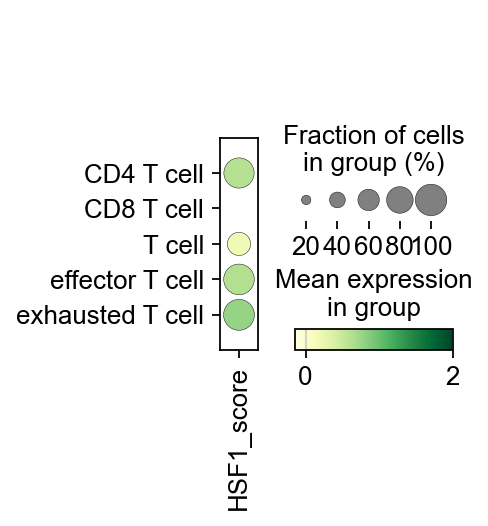

In [27]:
sc.pl.dotplot(adata_T, 'HSF1_score', groupby='celltype_detail', vmax=2,cmap='YlGn')
sc.pl.dotplot(adata_T_1, 'HSF1_score', groupby='celltype_detail', vmax=2,cmap='YlGn')
sc.pl.dotplot(adata_T_1[adata_T_1.obs['Myeloid_to_T_cluster44']=='M1toT4'], 'HSF1_score', vmax=2, groupby='celltype_detail',cmap='YlGn')
sc.pl.dotplot(adata_T_1[adata_T_1.obs['Myeloid_to_T_cluster44']=='M3toT4'], 'HSF1_score', vmax=2, groupby='celltype_detail',cmap='YlGn')